# Analysis of Visium 002um, ENACT, Bin2Cell, (SMURF soon)

In [1]:
import scanpy as sc
import os
import bin2cell as b2c
import celltypist
from celltypist import models
import numpy as np
import matplotlib.pyplot as plt
import os, scanpy as sc, pandas as pd, bin2cell as b2c
import seaborn as sns, matplotlib.pyplot as plt

In [11]:
# Patient 2 
p2_path002 = "/gpfs/commons/groups/innovation/jjoseph/data/P2_CRC/binned_outputs/square_002um/"
p2_source_image_path = "/gpfs/commons/groups/innovation/jjoseph/data/P2_CRC/Visium_HD_Human_Colon_Cancer_P2_tissue_image.btf"

#Patient 5
p5_path002 = "/gpfs/commons/groups/innovation/jjoseph/data/P5_CRC/binned_outputs/square_002um/"
p5_source_image_path = "/gpfs/commons/groups/innovation/jjoseph/data/P5_CRC/Visium_HD_Human_Colon_Cancer_P5_tissue_image.btf"



In [12]:
# Load P2 
p2_bdata = b2c.read_visium(p2_path002, source_image_path=p2_source_image_path)
p2_bdata.var_names_make_unique()
p2_bdata.raw = p2_bdata.copy()

# Load P5
p5_bdata = b2c.read_visium(p5_path002, source_image_path=p5_source_image_path)
p5_bdata.var_names_make_unique()
p5_bdata.raw = p5_bdata.copy()

In [13]:
#consitent filtering for all tests, require genes to show up in three cells
#remove bins wiht low gene 

# Patient 2 
sc.pp.filter_genes(p2_bdata, min_cells=3)
sc.pp.filter_cells(p2_bdata, min_genes=100)
sc.pp.calculate_qc_metrics(p2_bdata, inplace=True)

sc.pp.highly_variable_genes(p2_bdata, n_top_genes=5000, flavor="seurat_v3")
sc.pp.normalize_total(p2_bdata, target_sum=1e4)
sc.pp.log1p(p2_bdata)

# Patient 5 
sc.pp.filter_genes(p5_bdata, min_cells=3)
sc.pp.filter_cells(p5_bdata, min_genes=100)
sc.pp.calculate_qc_metrics(p5_bdata, inplace=True)

sc.pp.highly_variable_genes(p5_bdata, n_top_genes=5000, flavor="seurat_v3")
sc.pp.normalize_total(p5_bdata, target_sum=1e4)
sc.pp.log1p(p5_bdata)

In [5]:
predictions_p2 = celltypist.annotate(
    p2_bdata,
    model='data/single_cell/Human_Colorectal_Cancer.pkl',
    majority_voting=False
)

predictions_p5 = celltypist.annotate(
    p5_bdata,
    model='data/single_cell/Human_Colorectal_Cancer.pkl',
    majority_voting=False
)


🔬 Input data has 387731 cells and 18058 genes
🔗 Matching reference genes in the model
🧬 3733 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 379910 cells and 18049 genes
🔗 Matching reference genes in the model
🧬 3733 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


... storing 'feature_types' as categorical
... storing 'genome' as categorical


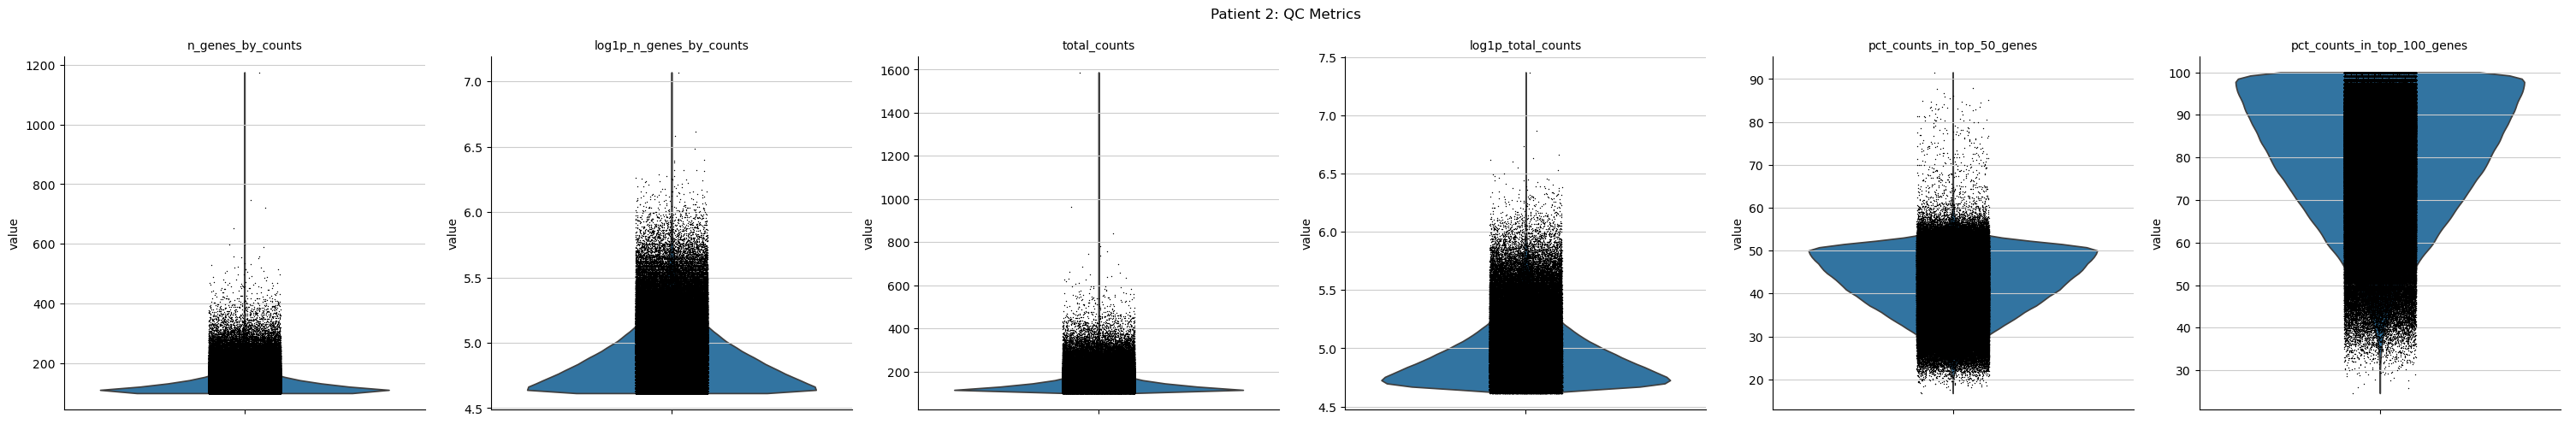

auto.py (21): IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2025-07-09 12:23:49.168300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-09 12:23:51.149272: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 12:23:52.362523: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been re

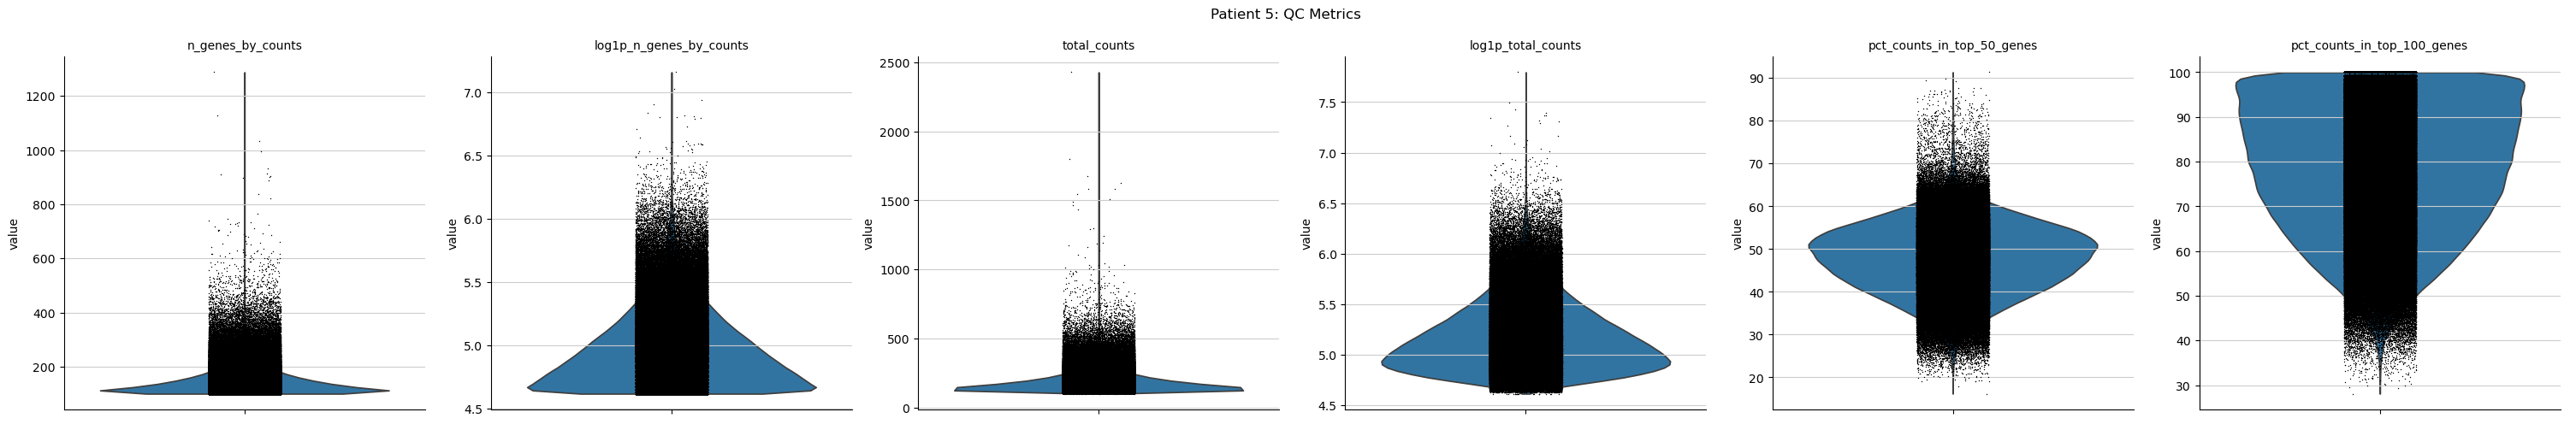

In [6]:
# Patient 2
p2_bdata = predictions_p2.to_adata()
sc.set_figure_params(dpi=50, fontsize=10)

sc.pl.violin(
    p2_bdata,
    ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
     'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes'],
    jitter=0.1,
    multi_panel=True,
    show=False
)
plt.suptitle('Patient 2: QC Metrics')
plt.tight_layout()
plt.show()

sc.set_figure_params(dpi=100, fontsize=10)
sc.pp.neighbors(p2_bdata)

# Patient 5
p5_bdata = predictions_p5.to_adata()
sc.set_figure_params(dpi=50, fontsize=10)

sc.pl.violin(
    p5_bdata,
    ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
     'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes'],
    jitter=0.1,
    multi_panel=True,
    show=False
)
plt.suptitle('Patient 5: QC Metrics')
plt.tight_layout()
plt.show()

#n genes by count is number of genes per cell 
#log genes by count just log 

#total UMI counts per celll (transcript)

#percent of total UMI comes from top 50 genes 

# top 100 genes per cell 

Analysis of ENACT data Patient 2 and Patient 5

In [7]:
# ENACT Data Analysis
import matplotlib.pyplot as plt


p2_cells_adata_path = '/gpfs/commons/groups/innovation/jjoseph/enact_results/P2_CRC/Cache/colon_P2/tmap/weighted_by_area|celltypist_cells_adata.h5'
p5_cells_adata_path = '/gpfs/commons/groups/innovation/jjoseph/enact_results/P5_CRC/Cache/colon_P5_demo/tmap/weighted_by_area|celltypist_cells_adata.h5'

p2_enact_adata = sc.read_h5ad(p2_cells_adata_path)
p5_enact_adata = sc.read_h5ad(p5_cells_adata_path)


# print('P2')
# print("Original shape:", p2_enact_adata.shape)
# sc.pp.filter_genes(p2_enact_adata, min_cells=3)
# print("After gene filter:", p2_enact_adata.shape)
# sc.pp.filter_cells(p2_enact_adata, min_genes=10)
# print("After cell filter:", p2_enact_adata.shape)


# print('P5')
# print("Original shape:", p5_enact_adata.shape)
# sc.pp.filter_genes(p5_enact_adata, min_cells=3)
# print("After gene filter:", p5_enact_adata.shape)
# sc.pp.filter_cells(p5_enact_adata, min_genes=100)
# print("After cell filter:", p5_enact_adata.shape)


for min_genes in [2, 4, 10, 100]:
    print(f"min_genes = {min_genes}")
    p2_temp = p2_enact_adata.copy()
    p5_temp = p5_enact_adata.copy()

    print('P2')
    print("Original shape:", p2_temp.shape)
    sc.pp.filter_genes(p2_temp, min_cells=3)
    print("After gene filter:", p2_temp.shape)
    sc.pp.filter_cells(p2_temp, min_genes=min_genes)
    print(f"After cell filter (min_genes={min_genes}):", p2_temp.shape)

    print('P5')
    print("Original shape:", p5_temp.shape)
    sc.pp.filter_genes(p5_temp, min_cells=3)
    print("After gene filter:", p5_temp.shape)
    sc.pp.filter_cells(p5_temp, min_genes=min_genes)
    print(f"After cell filter (min_genes={min_genes}):", p5_temp.shape)


#filter gene = keep genes seen in 3>= cells 
#filter cells with >= 100 detected genes(keep them)


min_genes = 2
P2
Original shape: (319662, 1089)
After gene filter: (319662, 1088)
After cell filter (min_genes=2): (315958, 1088)
P5
Original shape: (294395, 1089)
After gene filter: (294395, 1089)
After cell filter (min_genes=2): (287424, 1089)
min_genes = 4
P2
Original shape: (319662, 1089)
After gene filter: (319662, 1088)
After cell filter (min_genes=4): (305255, 1088)
P5
Original shape: (294395, 1089)
After gene filter: (294395, 1089)
After cell filter (min_genes=4): (268842, 1089)
min_genes = 10
P2
Original shape: (319662, 1089)
After gene filter: (319662, 1088)
After cell filter (min_genes=10): (208149, 1088)
P5
Original shape: (294395, 1089)
After gene filter: (294395, 1089)
After cell filter (min_genes=10): (161676, 1089)
min_genes = 100
P2
Original shape: (319662, 1089)
After gene filter: (319662, 1088)
After cell filter (min_genes=100): (0, 1088)
P5
Original shape: (294395, 1089)
After gene filter: (294395, 1089)
After cell filter (min_genes=100): (0, 1089)


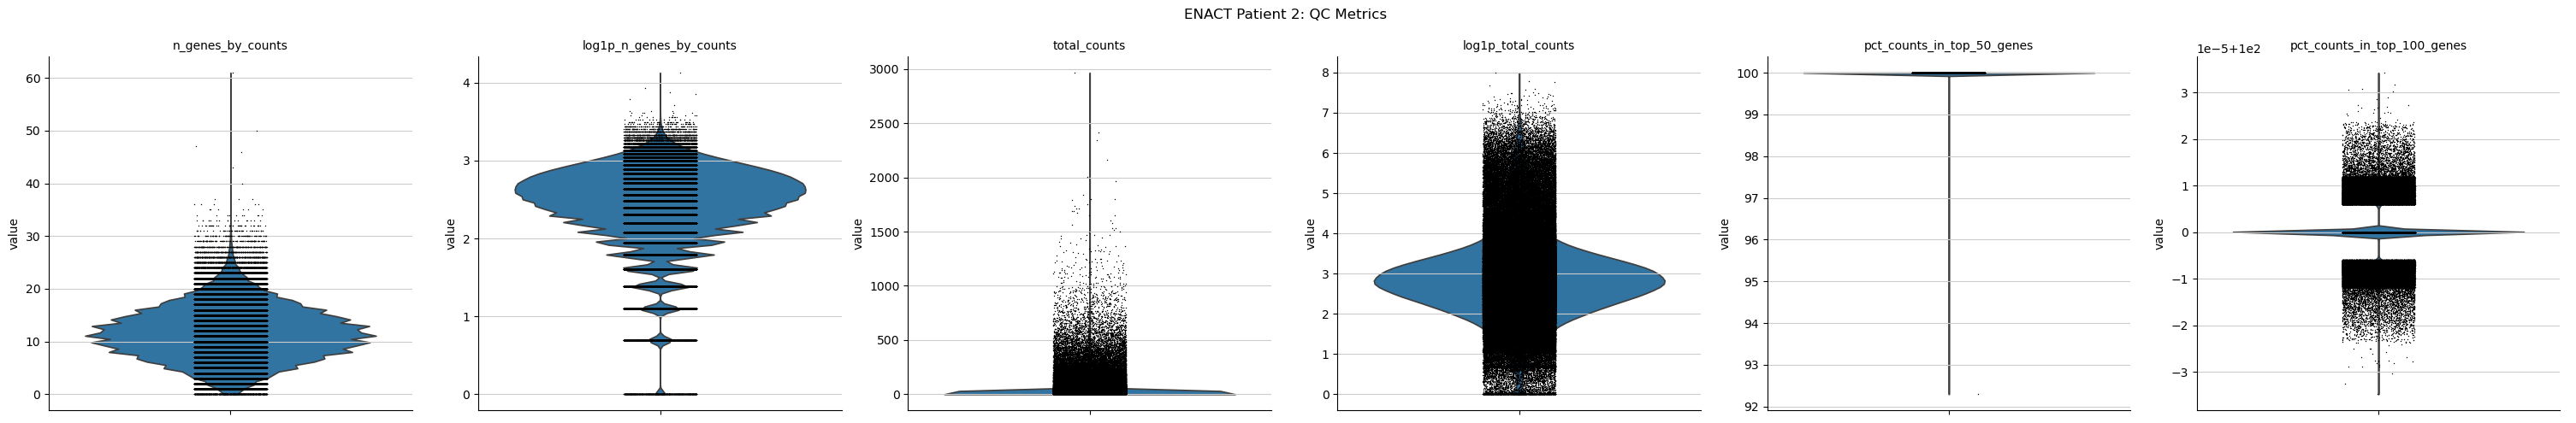

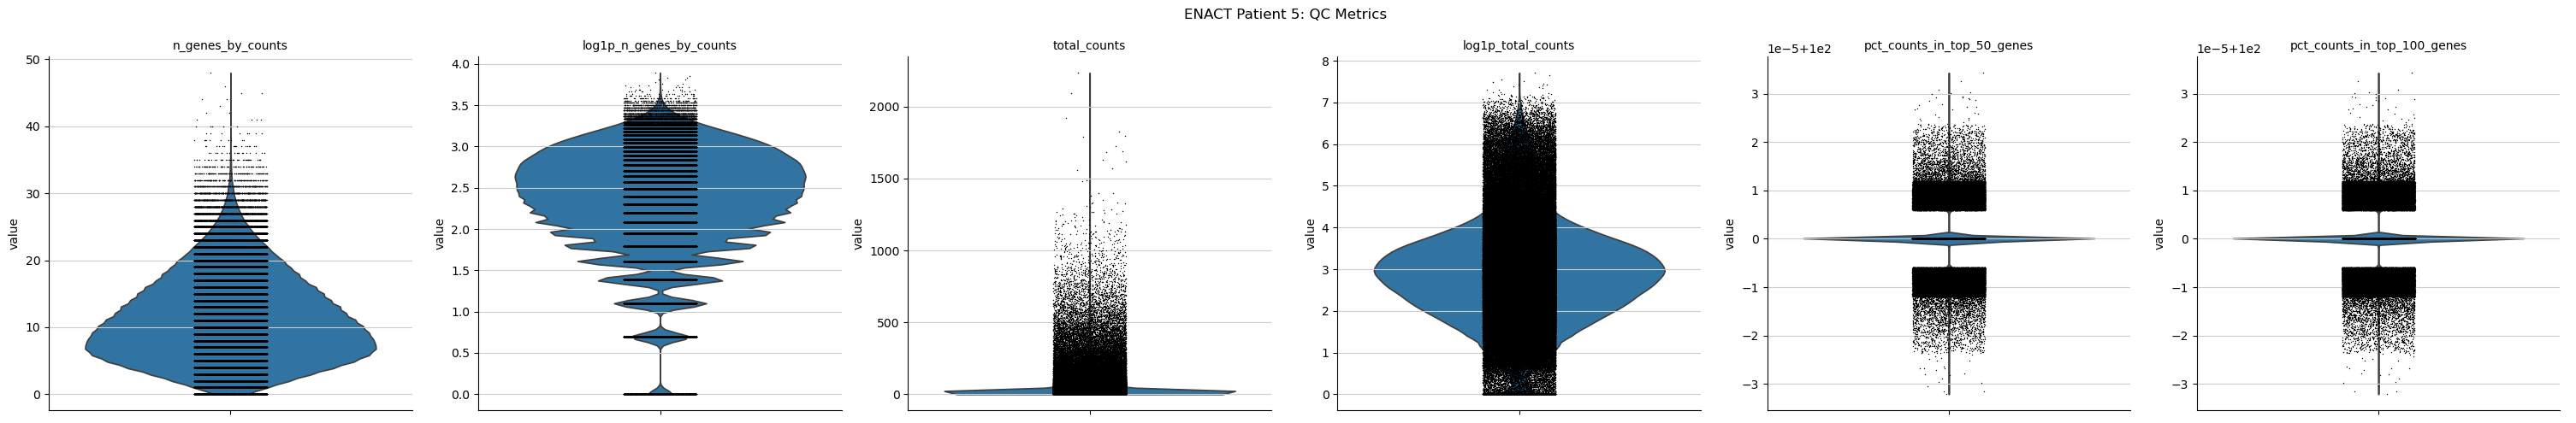

In [8]:
def preprocess_enact_adata(adata):
    adata.var_names_make_unique()
    adata.raw = adata.copy()
    sc.pp.filter_genes(adata, min_cells=3)
    # sc.pp.filter_cells(adata, min_genes=100)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    sc.pp.highly_variable_genes(adata, n_top_genes=5000, flavor="seurat_v3")
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    return adata

p2_enact_adata = preprocess_enact_adata(p2_enact_adata)
p5_enact_adata = preprocess_enact_adata(p5_enact_adata)

def plot_enact_qc_metrics(adata, patient_label):
    sc.set_figure_params(dpi=50, fontsize=10)
    sc.pl.violin(
        adata,
        ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
         'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes'],
        jitter=0.1,
        multi_panel=True,
        show=False
    )
    plt.suptitle(f'ENACT {patient_label}: QC Metrics')
    plt.tight_layout()
    plt.show()

plot_enact_qc_metrics(p2_enact_adata, 'Patient 2')
plot_enact_qc_metrics(p5_enact_adata, 'Patient 5')

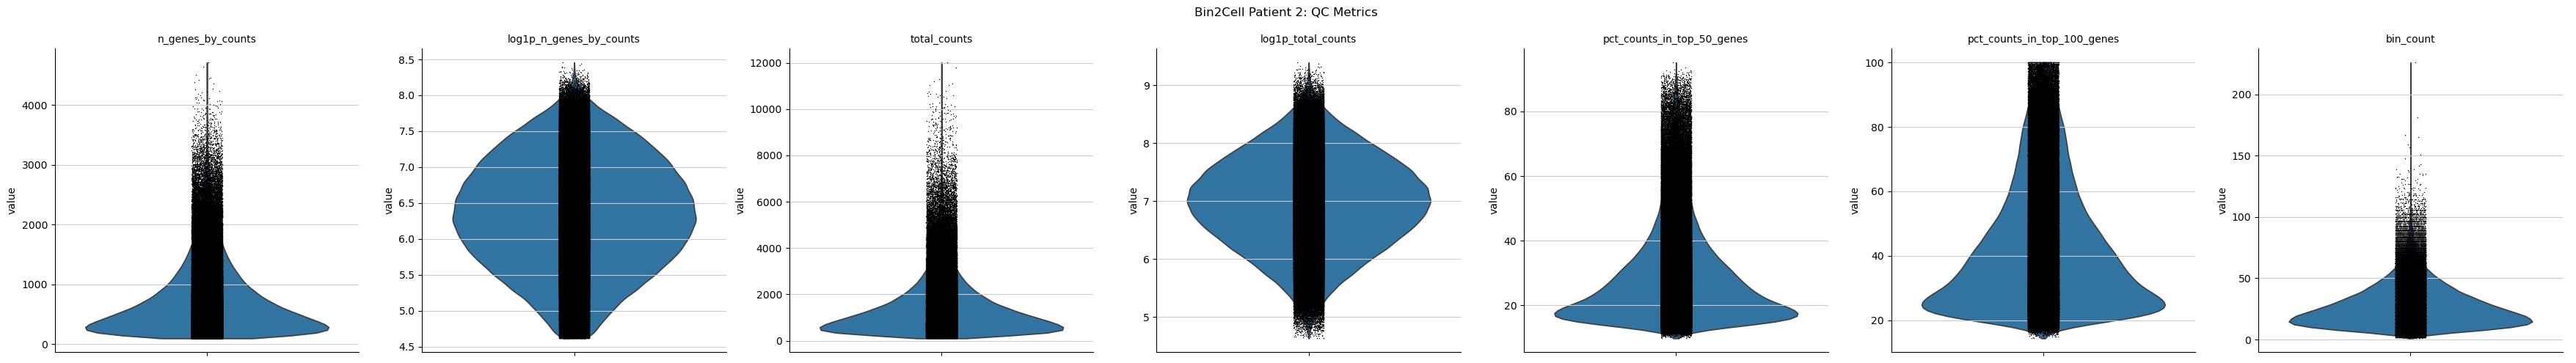

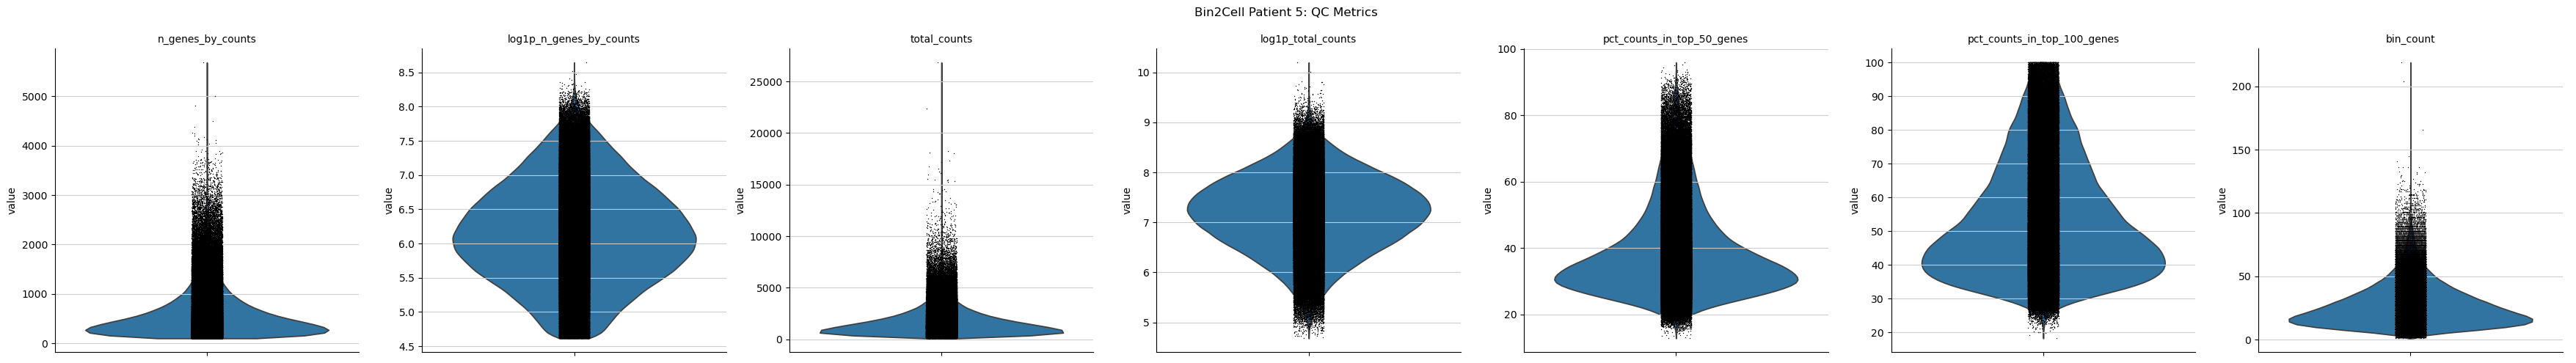

In [9]:
# Bin2Cell Data Analysis
# Load bin2cell data
p2_b2c = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P2CRC/P2CRC_b2c_cells.h5ad")
p5_b2c = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P5CRC/P5CRC_b2c_cells.h5ad")

def preprocess_b2c_adata(adata, min_cells=3, min_genes = 100, n_top_genes=5000):
    adata.var_names_make_unique()
    adata.raw = adata.copy()
    
    # Filter genes
    sc.pp.filter_genes(adata, min_cells=min_cells)
    sc.pp.filter_cells(adata, min_genes=min_genes)

    # QC metrics
    sc.pp.calculate_qc_metrics(adata, inplace=True)

    # HVGs and normalization
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor="seurat_v3")
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    return adata


def plot_b2c_qc_metrics(adata, patient_label):
    sc.set_figure_params(dpi=50, fontsize=10)
    sc.pl.violin(
        adata,
        ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
         'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'bin_count'],
        jitter=0.05,
        multi_panel=True,
        show=False
    )
    plt.suptitle(f'Bin2Cell {patient_label}: QC Metrics')
    plt.tight_layout()
    plt.show()


p2_b2c = preprocess_b2c_adata(p2_b2c)
p5_b2c = preprocess_b2c_adata(p5_b2c)

plot_b2c_qc_metrics(p2_b2c, 'Patient 2')
plot_b2c_qc_metrics(p5_b2c, 'Patient 5')

In [10]:
for min_genes in [2, 4, 10,100]:
    print(f"min_genes = {min_genes}")
    p2_temp = p2_b2c.copy()
    p5_temp = p5_b2c.copy()

    print('P2')
    print("Original shape:", p2_temp.shape)
    sc.pp.filter_genes(p2_temp, min_cells=3)
    print("After gene filter:", p2_temp.shape)
    sc.pp.filter_cells(p2_temp, min_genes=min_genes)
    print(f"After cell filter (min_genes={min_genes}):", p2_temp.shape)

    print('P5')
    print("Original shape:", p5_temp.shape)
    sc.pp.filter_genes(p5_temp, min_cells=3)
    print("After gene filter:", p5_temp.shape)
    sc.pp.filter_cells(p5_temp, min_genes=min_genes)
    print(f"After cell filter (min_genes={min_genes}):", p5_temp.shape)


min_genes = 2
P2
Original shape: (231841, 18056)
After gene filter: (231841, 18056)
After cell filter (min_genes=2): (231841, 18056)
P5
Original shape: (212729, 18048)
After gene filter: (212729, 18048)
After cell filter (min_genes=2): (212729, 18048)
min_genes = 4
P2
Original shape: (231841, 18056)
After gene filter: (231841, 18056)
After cell filter (min_genes=4): (231841, 18056)
P5
Original shape: (212729, 18048)
After gene filter: (212729, 18048)
After cell filter (min_genes=4): (212729, 18048)
min_genes = 10
P2
Original shape: (231841, 18056)
After gene filter: (231841, 18056)
After cell filter (min_genes=10): (231841, 18056)
P5
Original shape: (212729, 18048)
After gene filter: (212729, 18048)
After cell filter (min_genes=10): (212729, 18048)
min_genes = 100
P2
Original shape: (231841, 18056)
After gene filter: (231841, 18056)
After cell filter (min_genes=100): (231841, 18056)
P5
Original shape: (212729, 18048)
After gene filter: (212729, 18048)
After cell filter (min_genes=100):

In [22]:
paths = {
    "visium_002_P2": "/gpfs/commons/groups/innovation/jjoseph/data/P2_CRC/binned_outputs/square_002um/",
    "visium_008_P2": "/gpfs/commons/groups/innovation/jjoseph/data/P2_CRC/binned_outputs/square_008um/",
    "visium_002_P5": "/gpfs/commons/groups/innovation/jjoseph/data/P5_CRC/binned_outputs/square_002um/",
    "visium_008_P5": "/gpfs/commons/groups/innovation/jjoseph/data/P5_CRC/binned_outputs/square_008um/",

    "bin2cell_P2":   "/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P2CRC/P2CRC_b2c_cells.h5ad",
    "bin2cell_P5":   "/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P5CRC/P5CRC_b2c_cells.h5ad",

    "enact_P2":      "/gpfs/commons/groups/innovation/jjoseph/enact_results/P2_CRC/Cache/colon_P2/tmap/weighted_by_area|celltypist_cells_adata.h5",
    "enact_P5":      "/gpfs/commons/groups/innovation/jjoseph/enact_results/P5_CRC/Cache/colon_P5_demo/tmap/weighted_by_area|celltypist_cells_adata.h5",
}

FEATURES = [
    'n_genes_by_counts', 'log1p_n_genes_by_counts',
    'total_counts', 'log1p_total_counts',
    'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes'
]

dfs = []
for label, path in paths.items():
    if os.path.isdir(path):                              
        adata = b2c.read_visium(path)
        adata.var_names_make_unique()
        sc.pp.filter_genes(adata, min_cells=3)
        sc.pp.filter_cells(adata, min_genes=100)
    else:                                                
        adata = sc.read_h5ad(path)
        if "enact" not in label:                      
            sc.pp.filter_cells(adata, min_genes=100)

    sc.pp.calculate_qc_metrics(adata, inplace=True)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    dfs.append(adata.obs[FEATURES].assign(dataset=label))

qc_all_df = pd.concat(dfs, ignore_index=True)


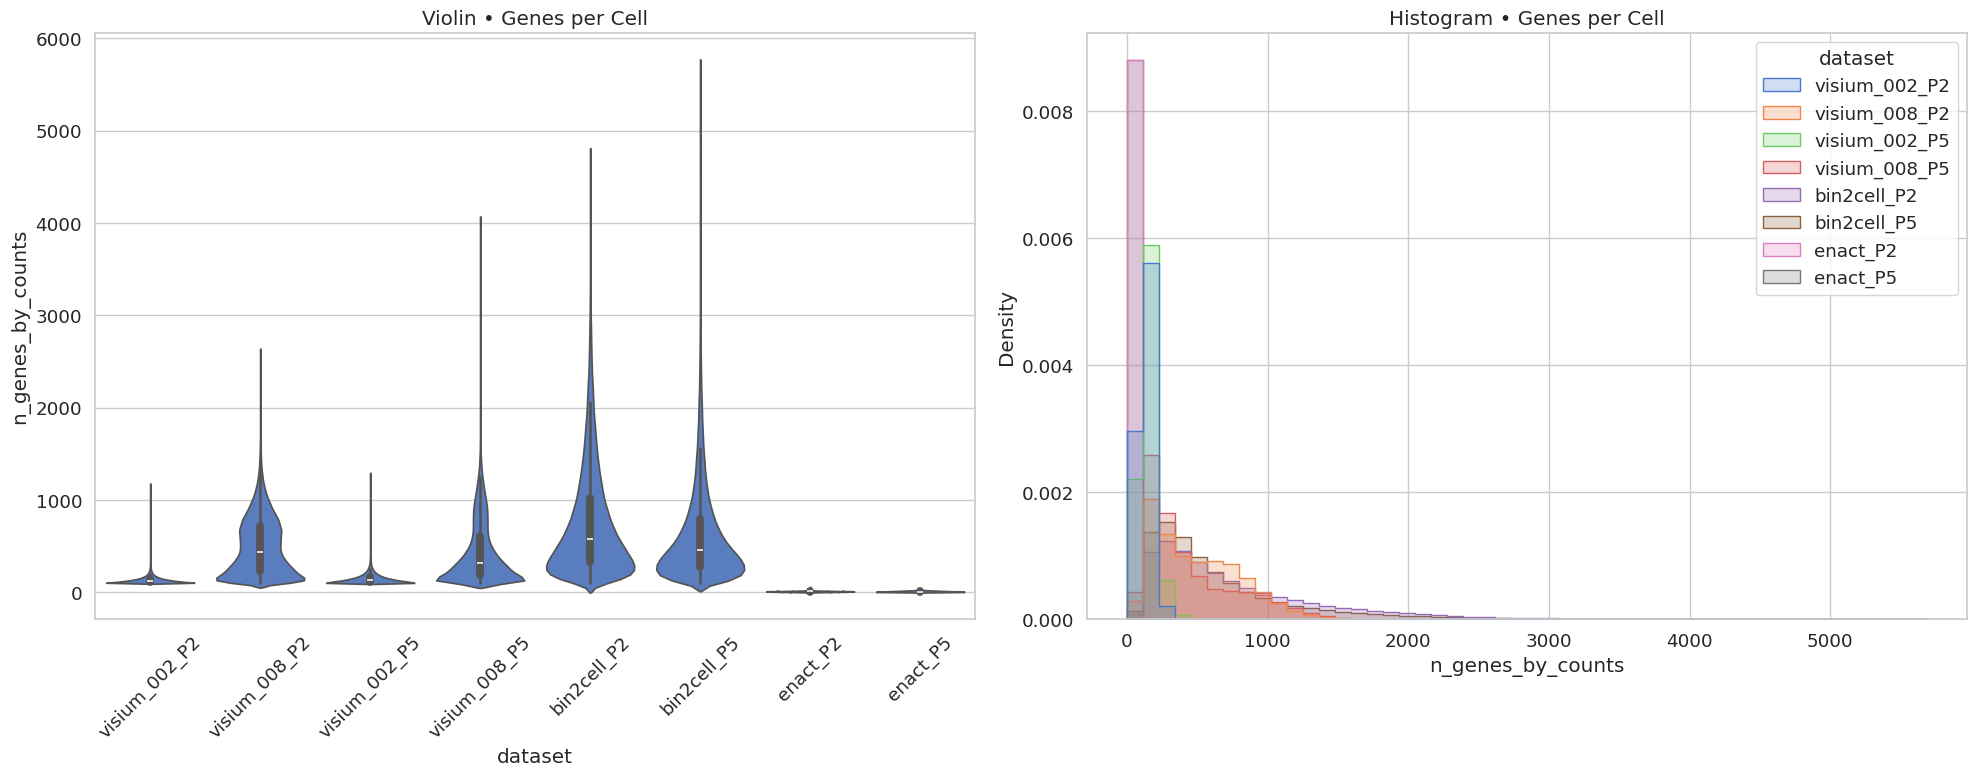

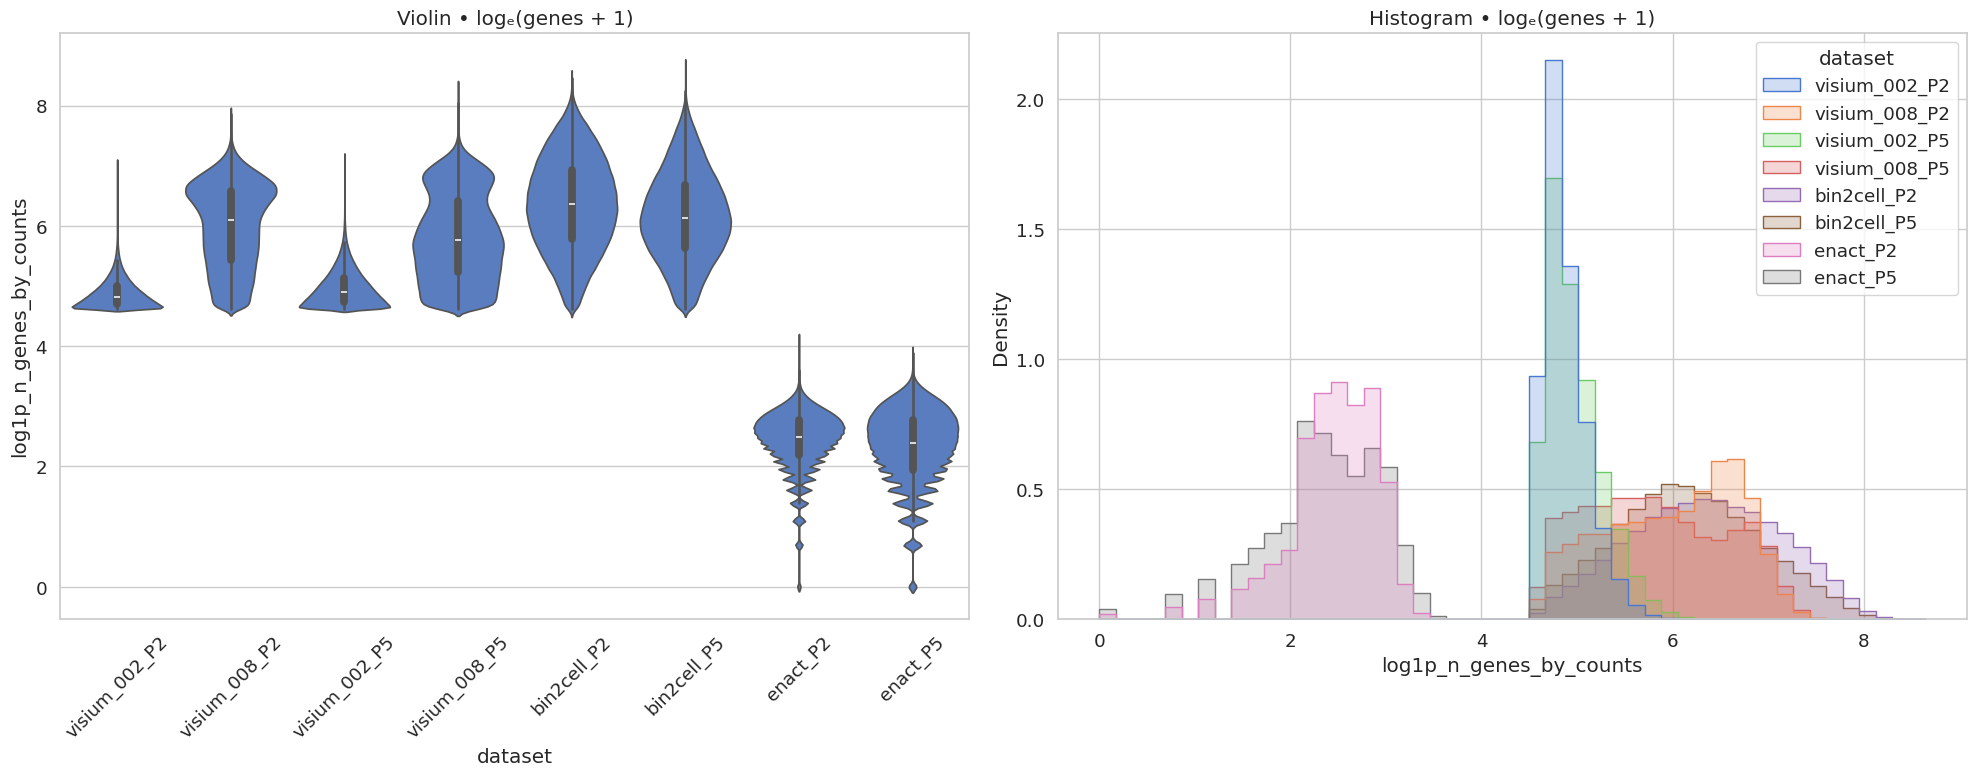

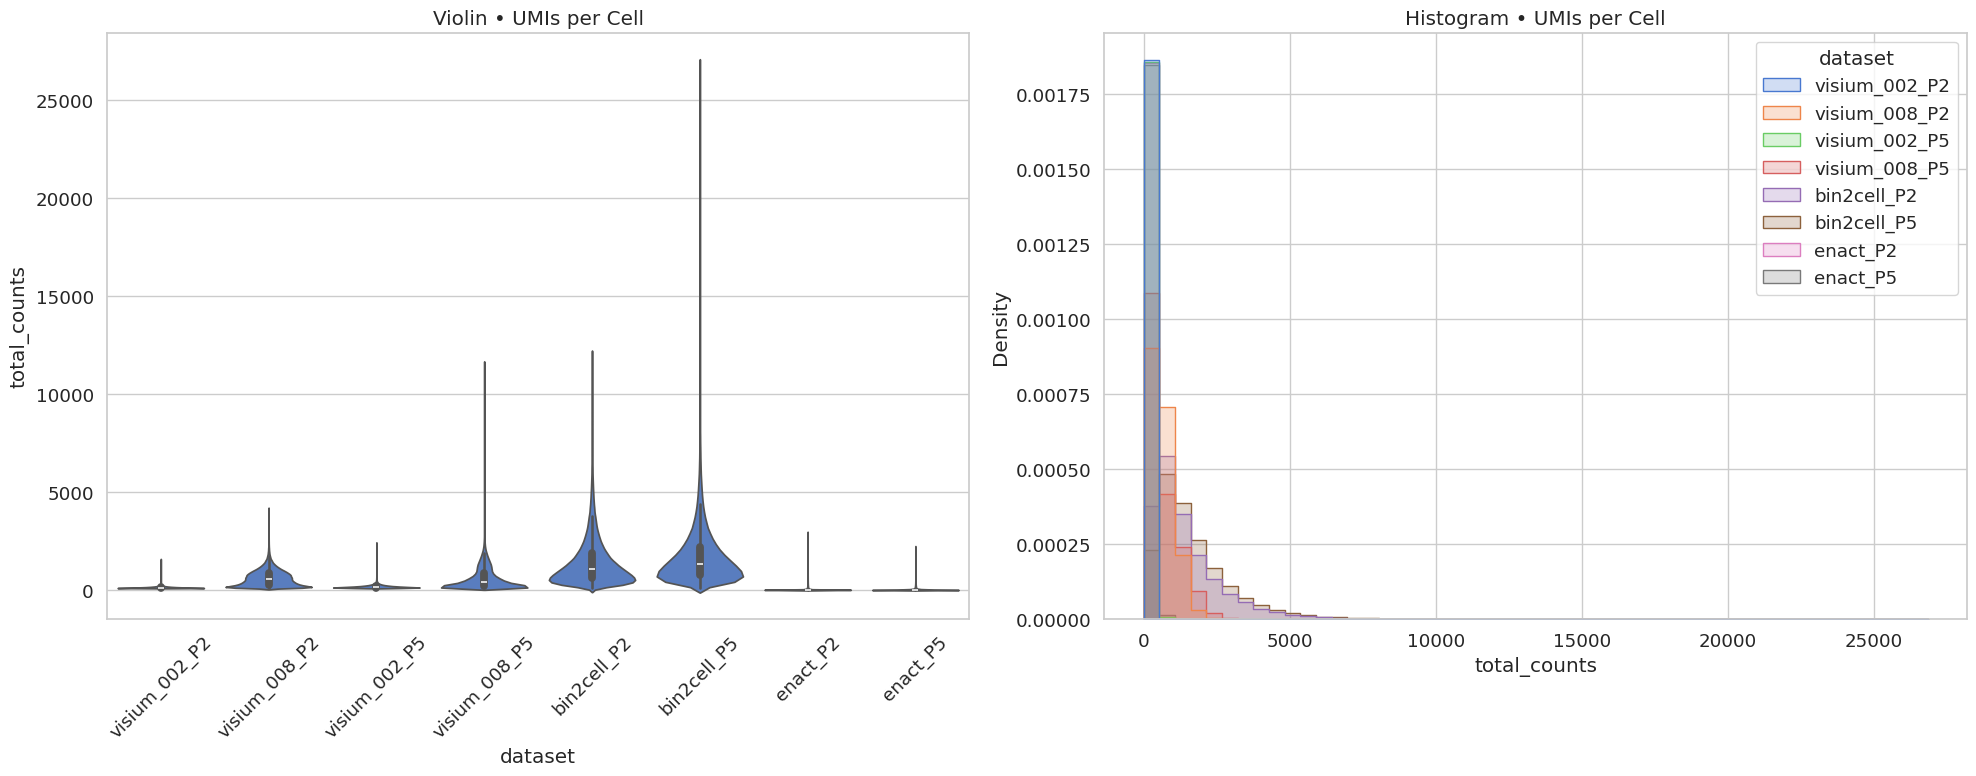

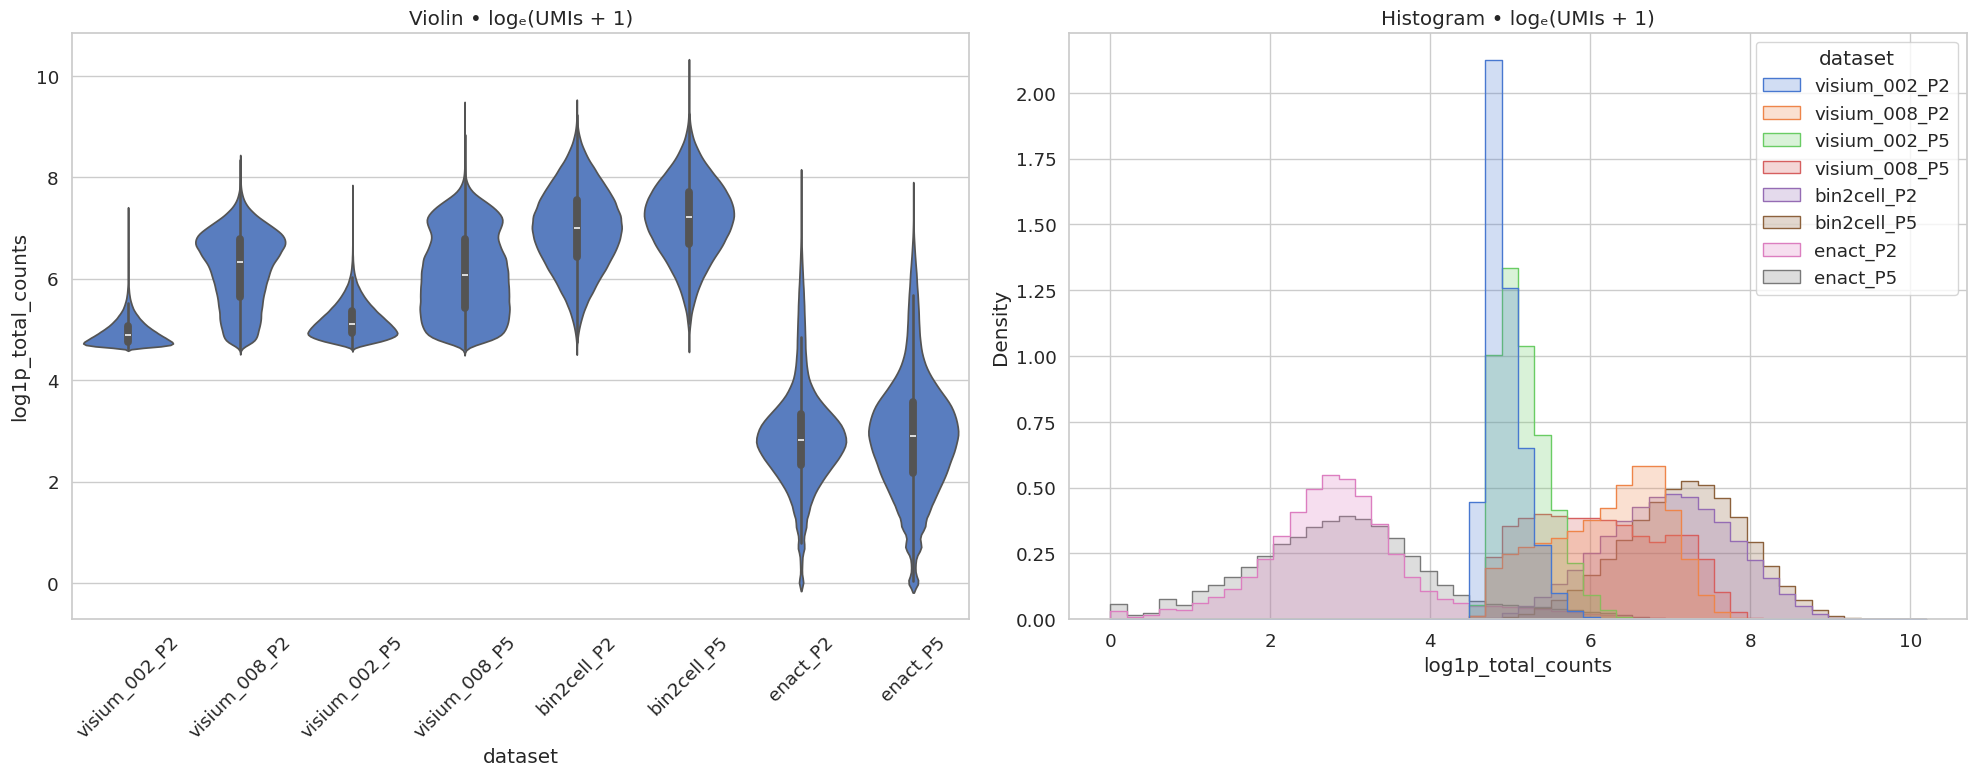

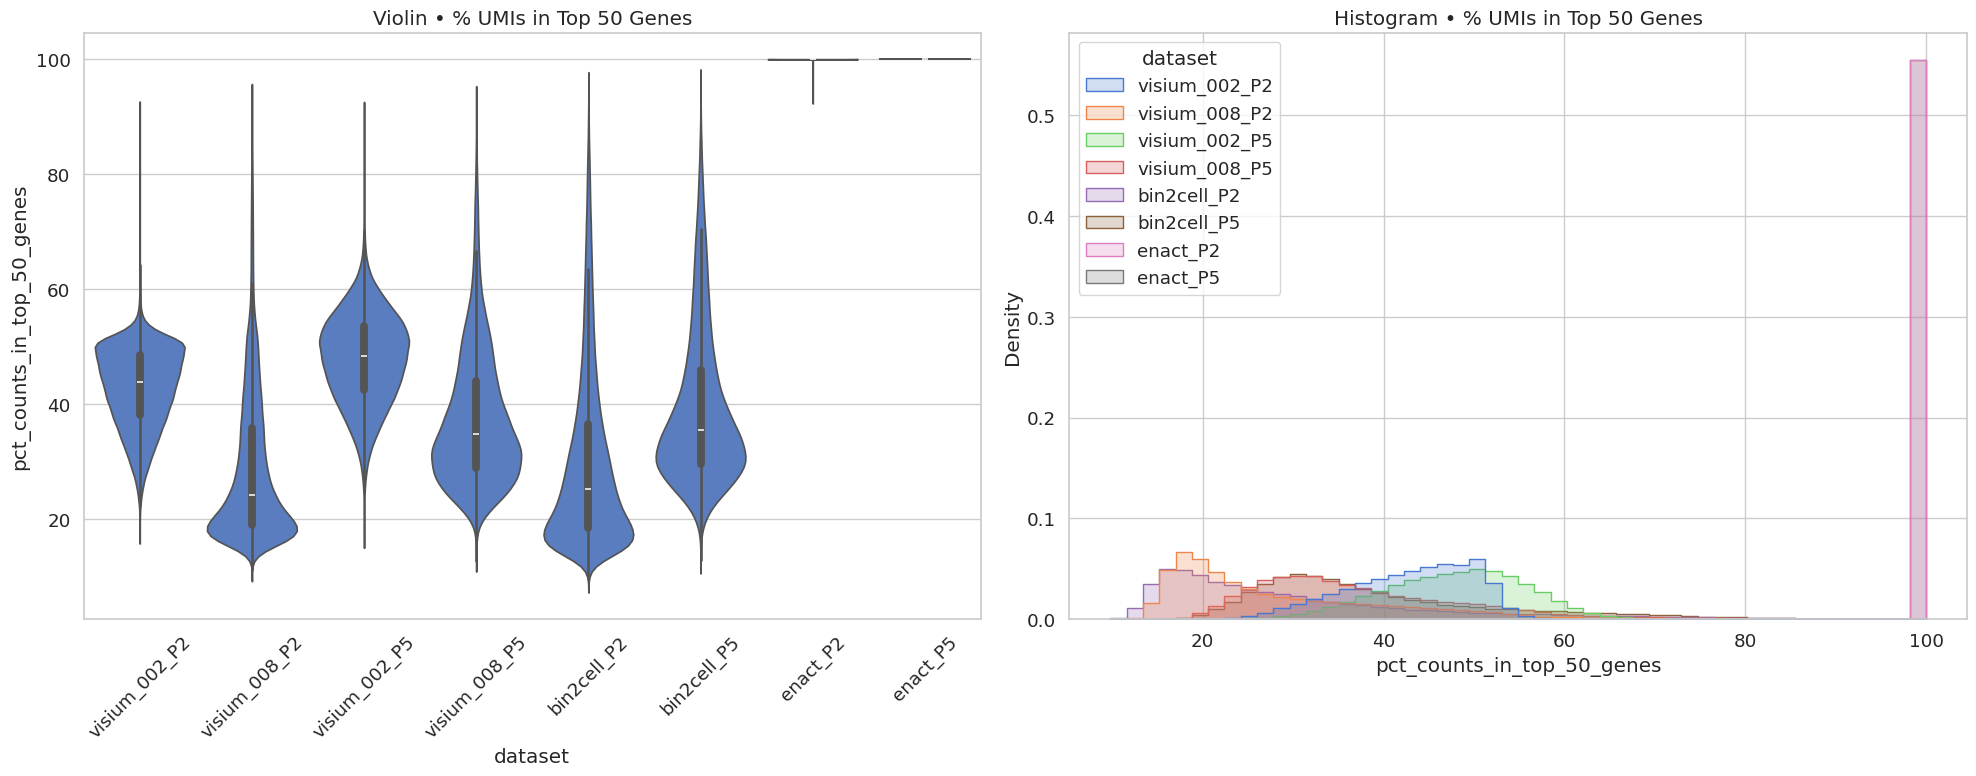

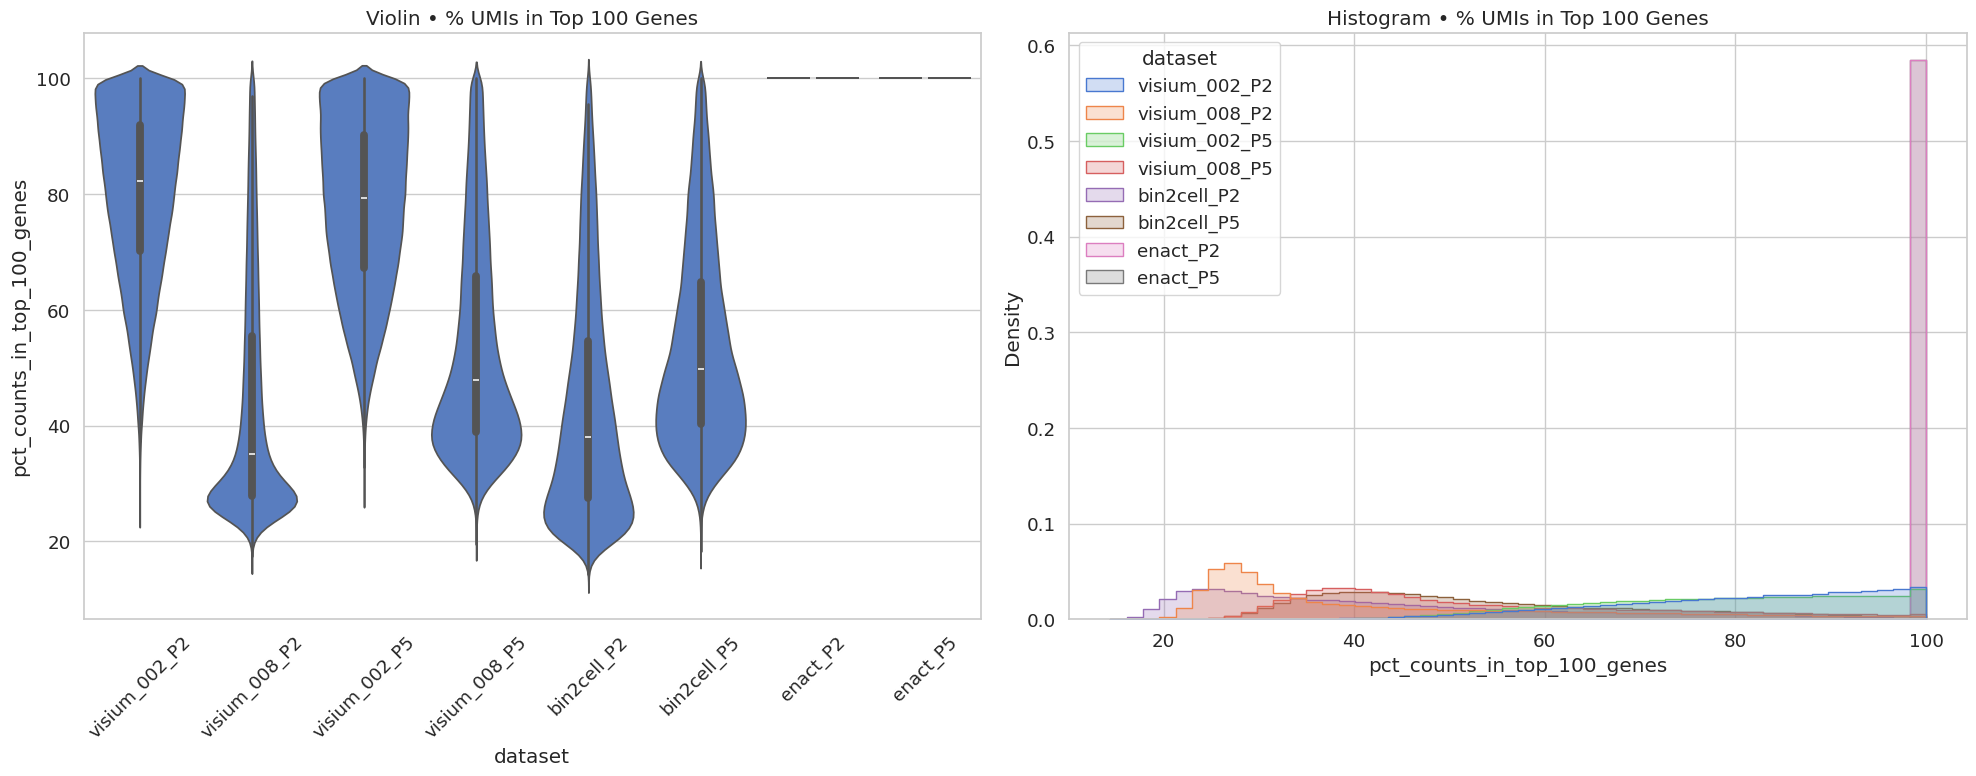

In [5]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

titles = [
    ('n_genes_by_counts',            'Genes per Cell'),
    ('log1p_n_genes_by_counts',      'logₑ(genes + 1)'),
    ('total_counts',                 'UMIs per Cell'),
    ('log1p_total_counts',           'logₑ(UMIs + 1)'),
    ('pct_counts_in_top_50_genes',   '% UMIs in Top 50 Genes'),
    ('pct_counts_in_top_100_genes',  '% UMIs in Top 100 Genes')
]

for feat, ttl in titles:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    sns.violinplot(data=qc_all_df, x="dataset", y=feat,
                   scale='width', inner='box')
    plt.xticks(rotation=45); plt.title(f'Violin • {ttl}')

    plt.subplot(1,2,2)
    sns.histplot(data=qc_all_df, x=feat, hue="dataset",
                 element="step", bins=50,
                 stat="density", common_norm=False)
    plt.title(f'Histogram • {ttl}')

    plt.tight_layout(); plt.show()




# n genes by counts:  number of genes >1 umi in a cell 
# log: natural log 

#total counts: total umi detected in cell 

#percent counts in top 50& 100 : of  each cells umi coming from 50 expressed genes 


In [7]:
import scanpy as sc

# Load bin2cell adata for P2
bin2cell_adata = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P2CRC/P2CRC_b2c_cells.h5ad")

# Load ENACT adata for P2
enact_adata = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/enact_results/P2_CRC/Cache/colon_P2/tmap/weighted_by_area|celltypist_cells_adata.h5")

# Load SMURF adata for P2 (assuming a likely path based on naming conventions)
smurf_adata = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/smurf_results/smurf_p2_interactive_07_20/adata_sc_final.h5ad")


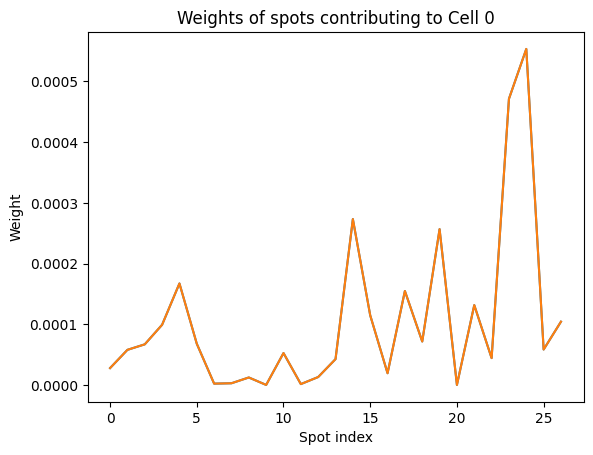

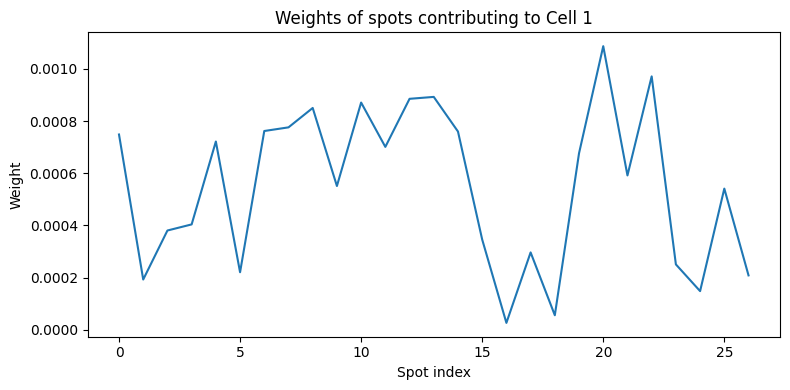

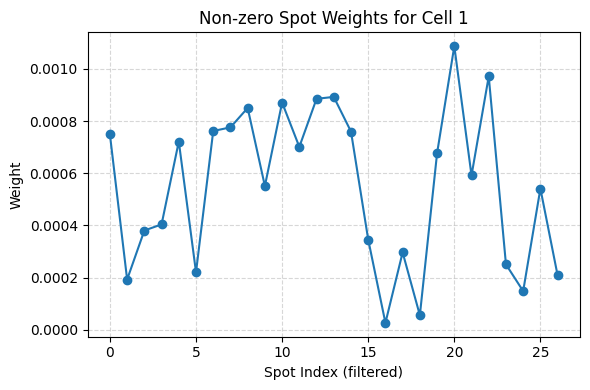

<Figure size 800x400 with 0 Axes>

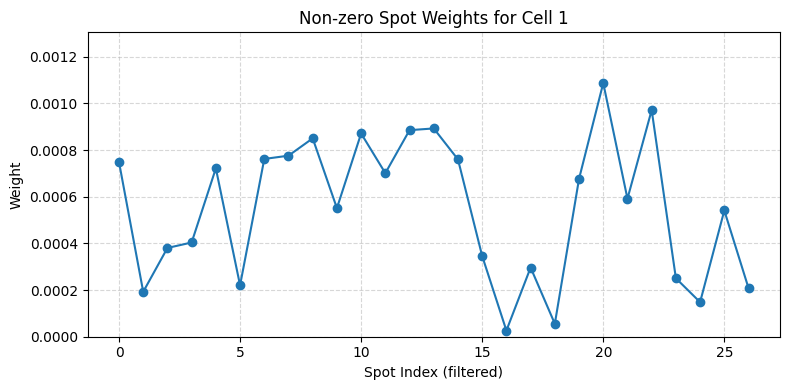

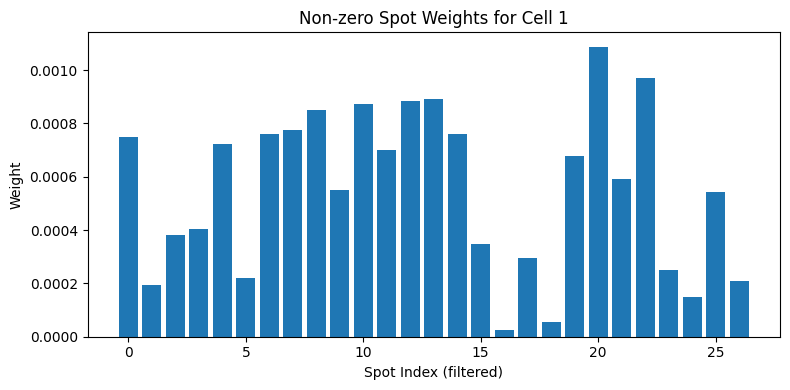

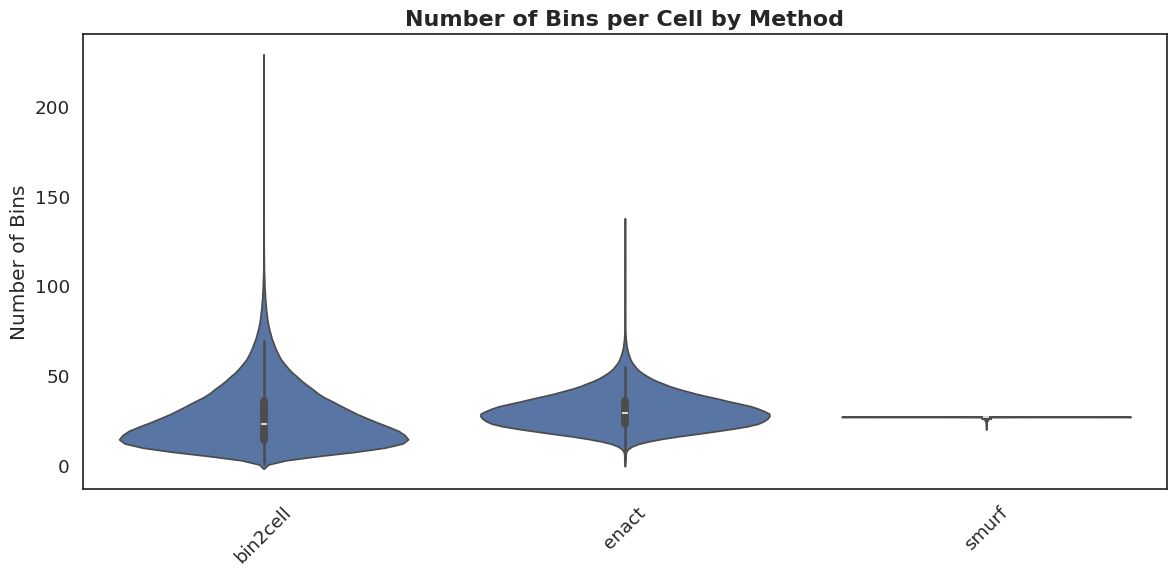

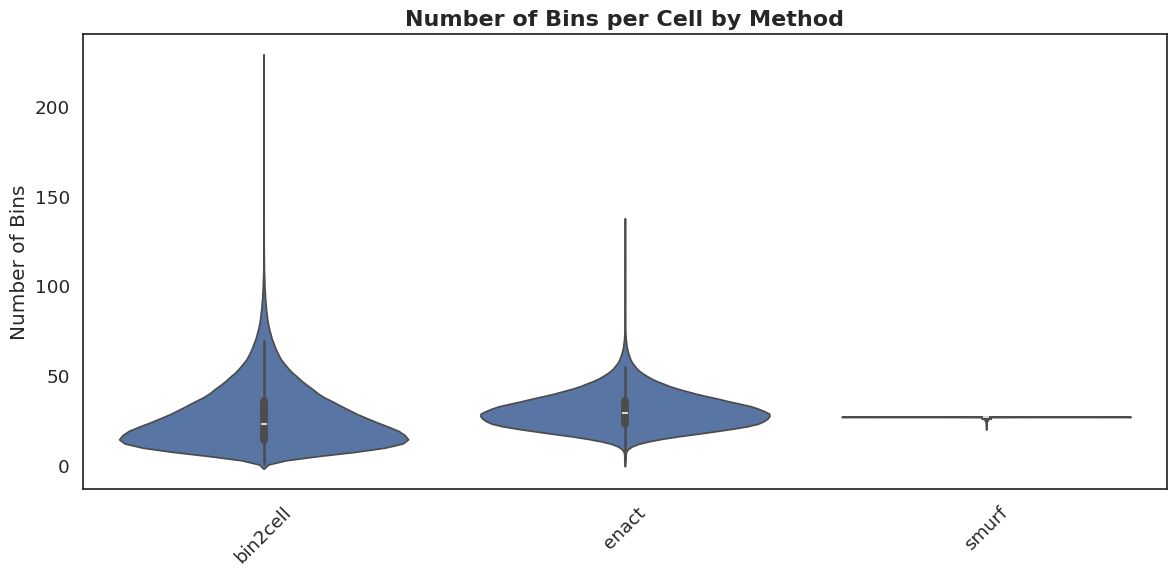

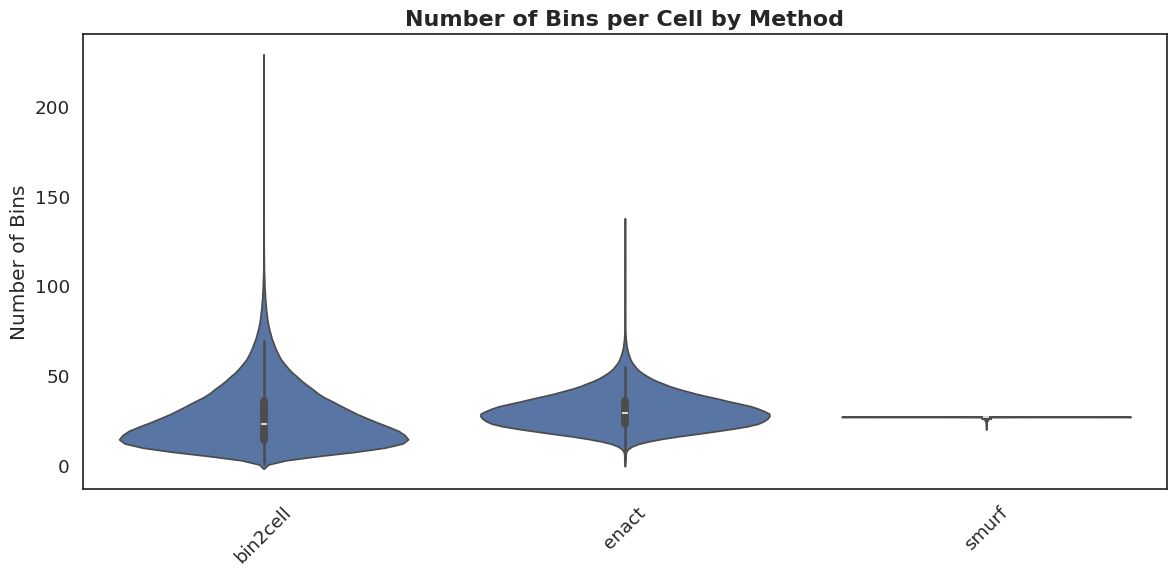

In [35]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline


sns.set(style="white", font_scale=1.2)

bin2cell_df = bin2cell_adata.obs[["bin_count"]].copy()
bin2cell_df["method"] = "bin2cell"

enact_stats = enact_adata.obsm["stats"]
enact_bin_counts = enact_stats["num_shared_bins"] + enact_stats["num_unique_bins"]
enact_df = pd.DataFrame({
    "bin_count": enact_bin_counts.values,
    "method": "enact"
})

# Load weights_record.pkl and extract matrix
with open("/gpfs/commons/groups/innovation/jjoseph/smurf_results/smurf_p2_interactive_07_20/weights_record.pkl", "rb") as f:
    weights_matrix = pickle.load(f)

# NumPy array: (spots, cells)
smurf_bin_counts = (weights_matrix > 0).sum(axis=0)
smurf_df = pd.DataFrame({
    "bin_count": smurf_bin_counts.flatten(),
    "method": "smurf"
})

#Combine all
all_df = pd.concat([bin2cell_df, enact_df, smurf_df], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.violinplot(data=all_df, x="method", y="bin_count", inner="box", scale="width")
plt.title("Number of Bins per Cell by Method", fontsize=16, weight='bold')
plt.ylabel("Number of Bins")
plt.xlabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


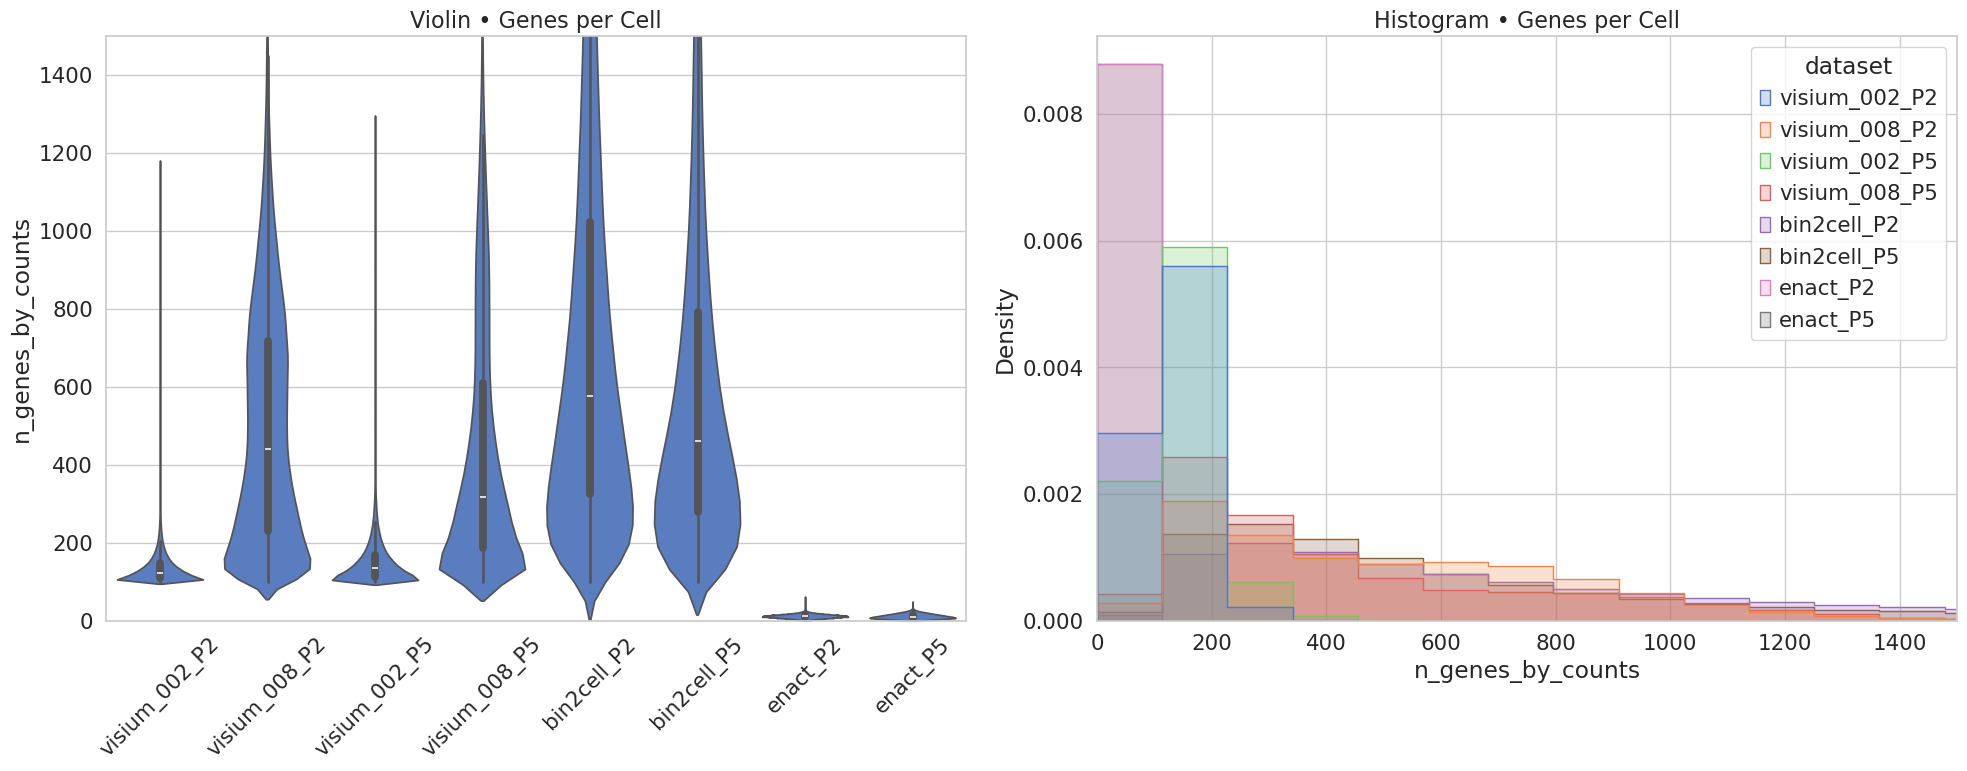

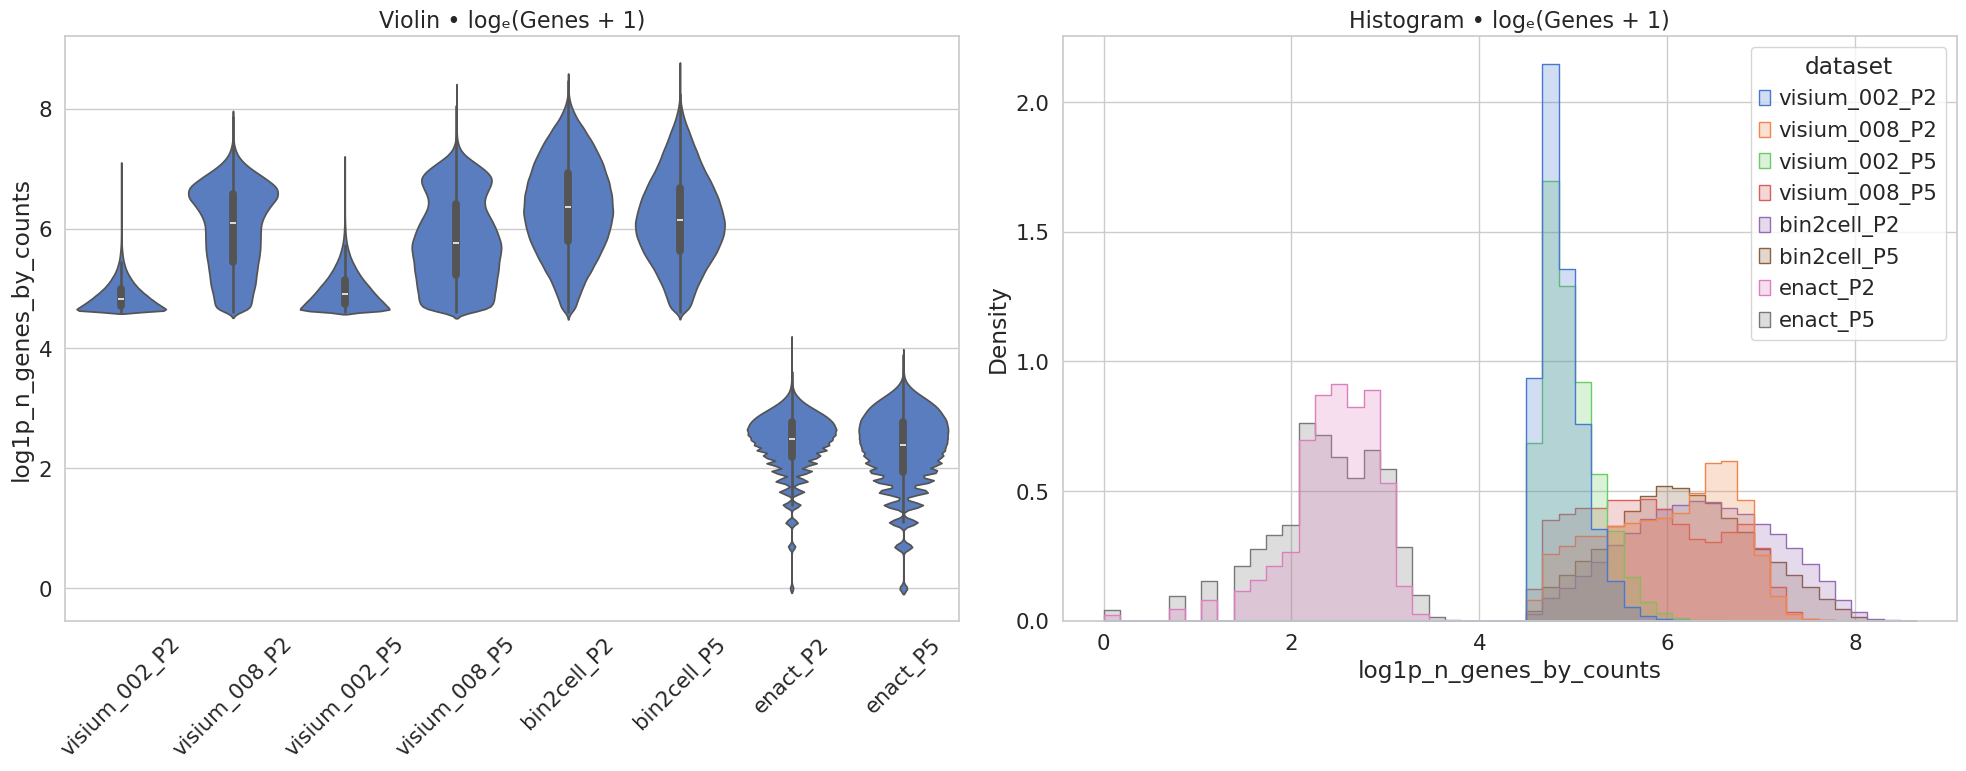

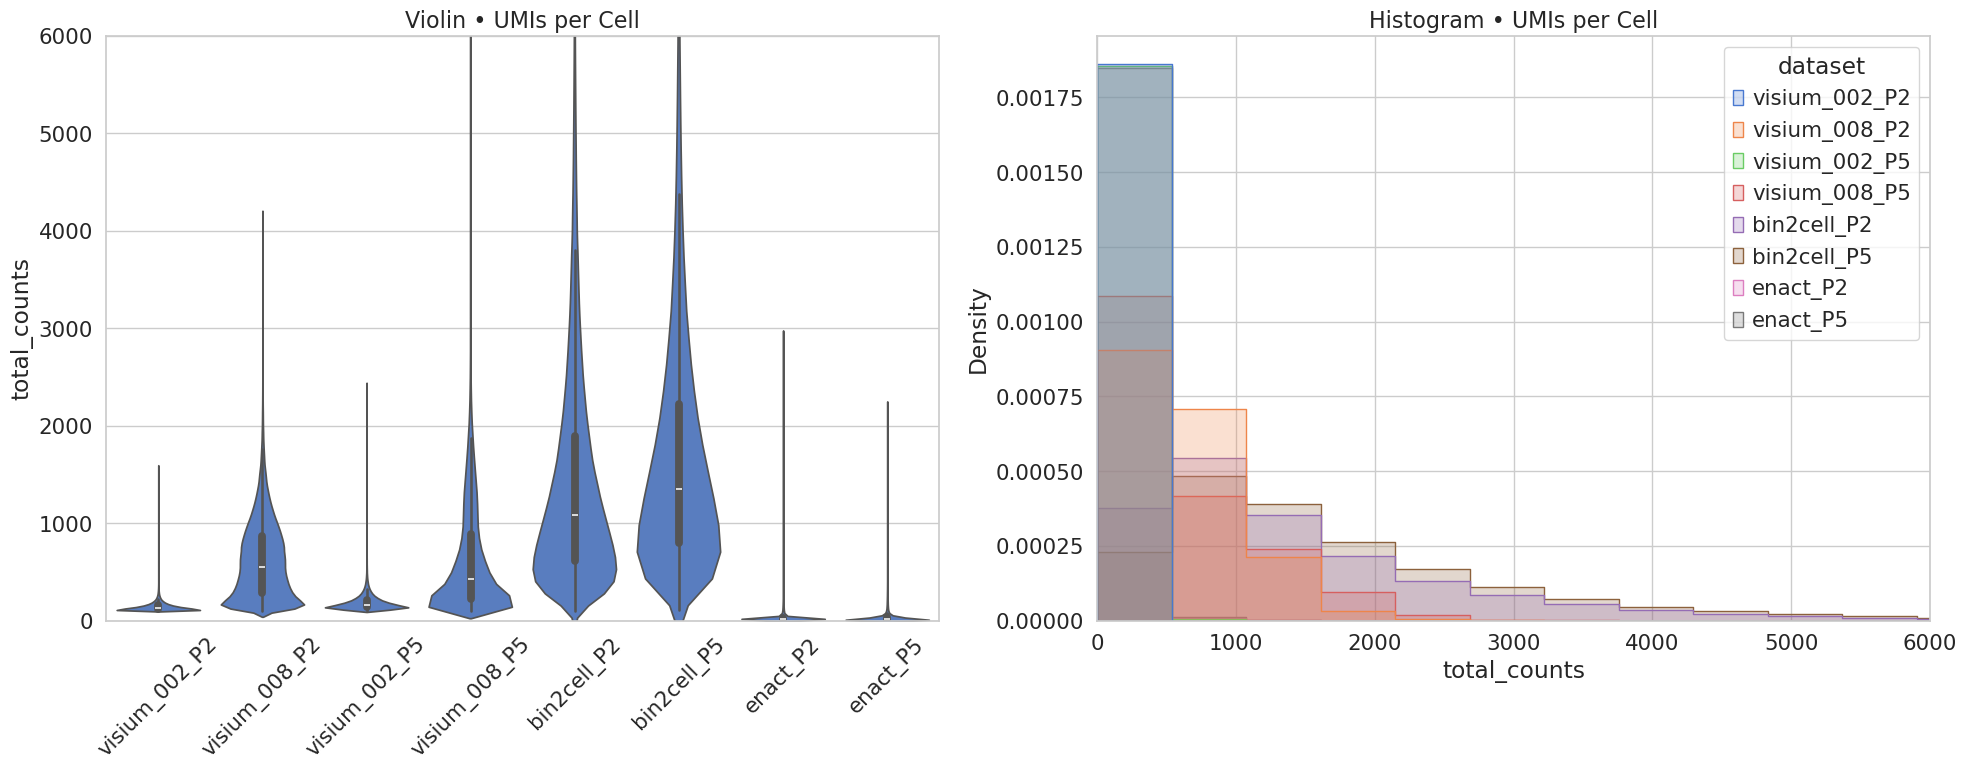

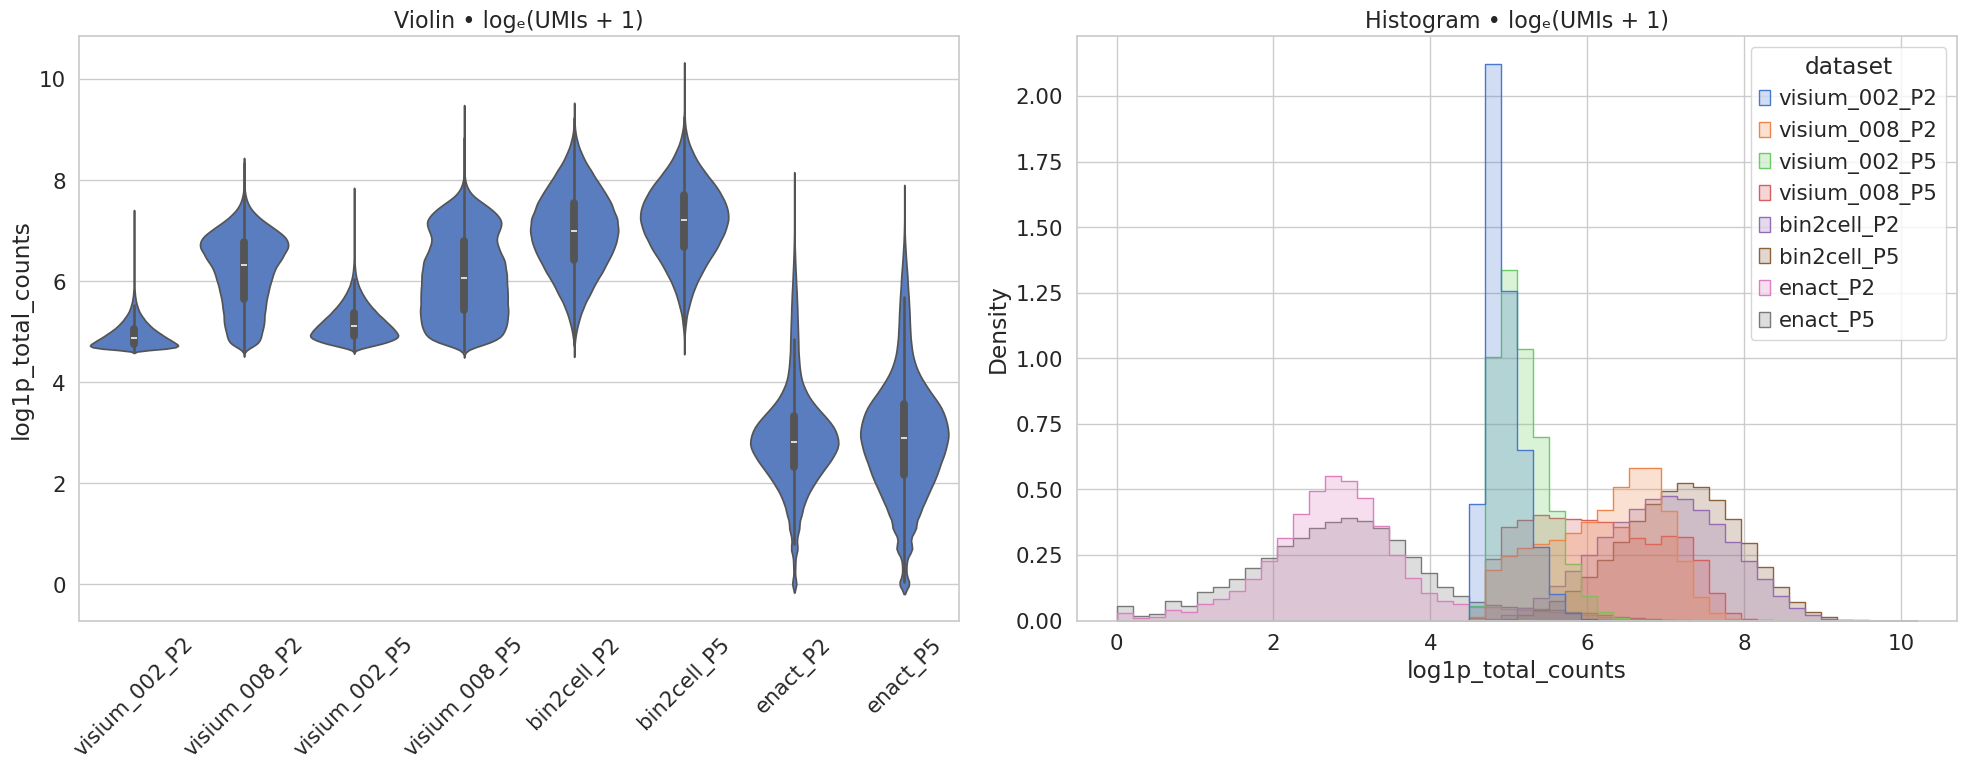

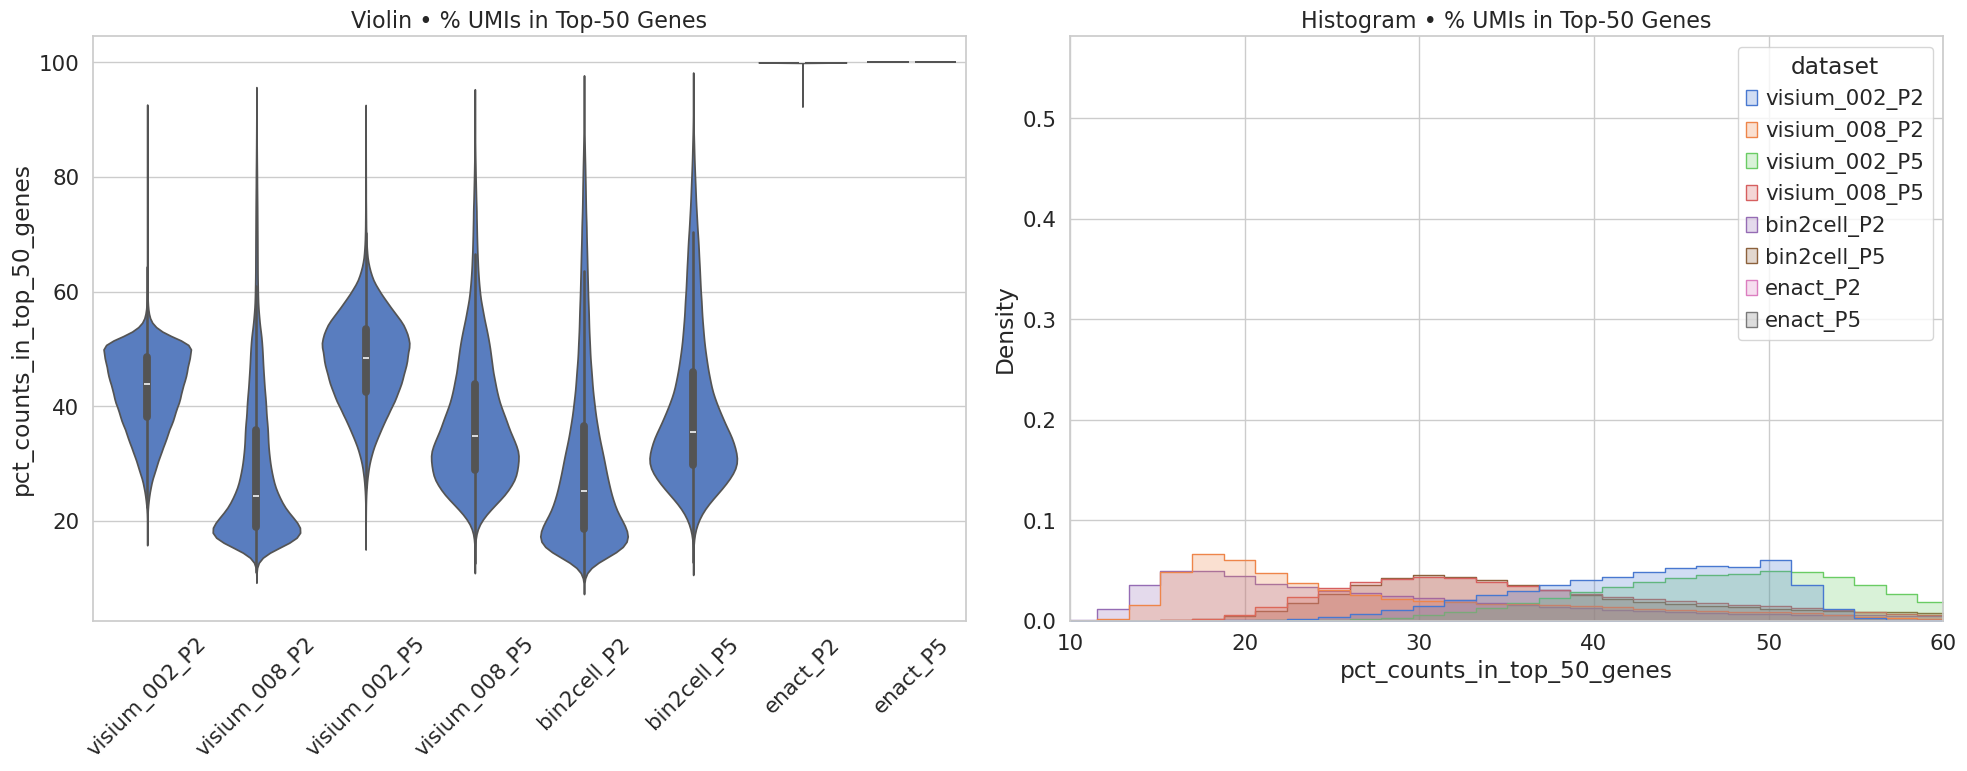

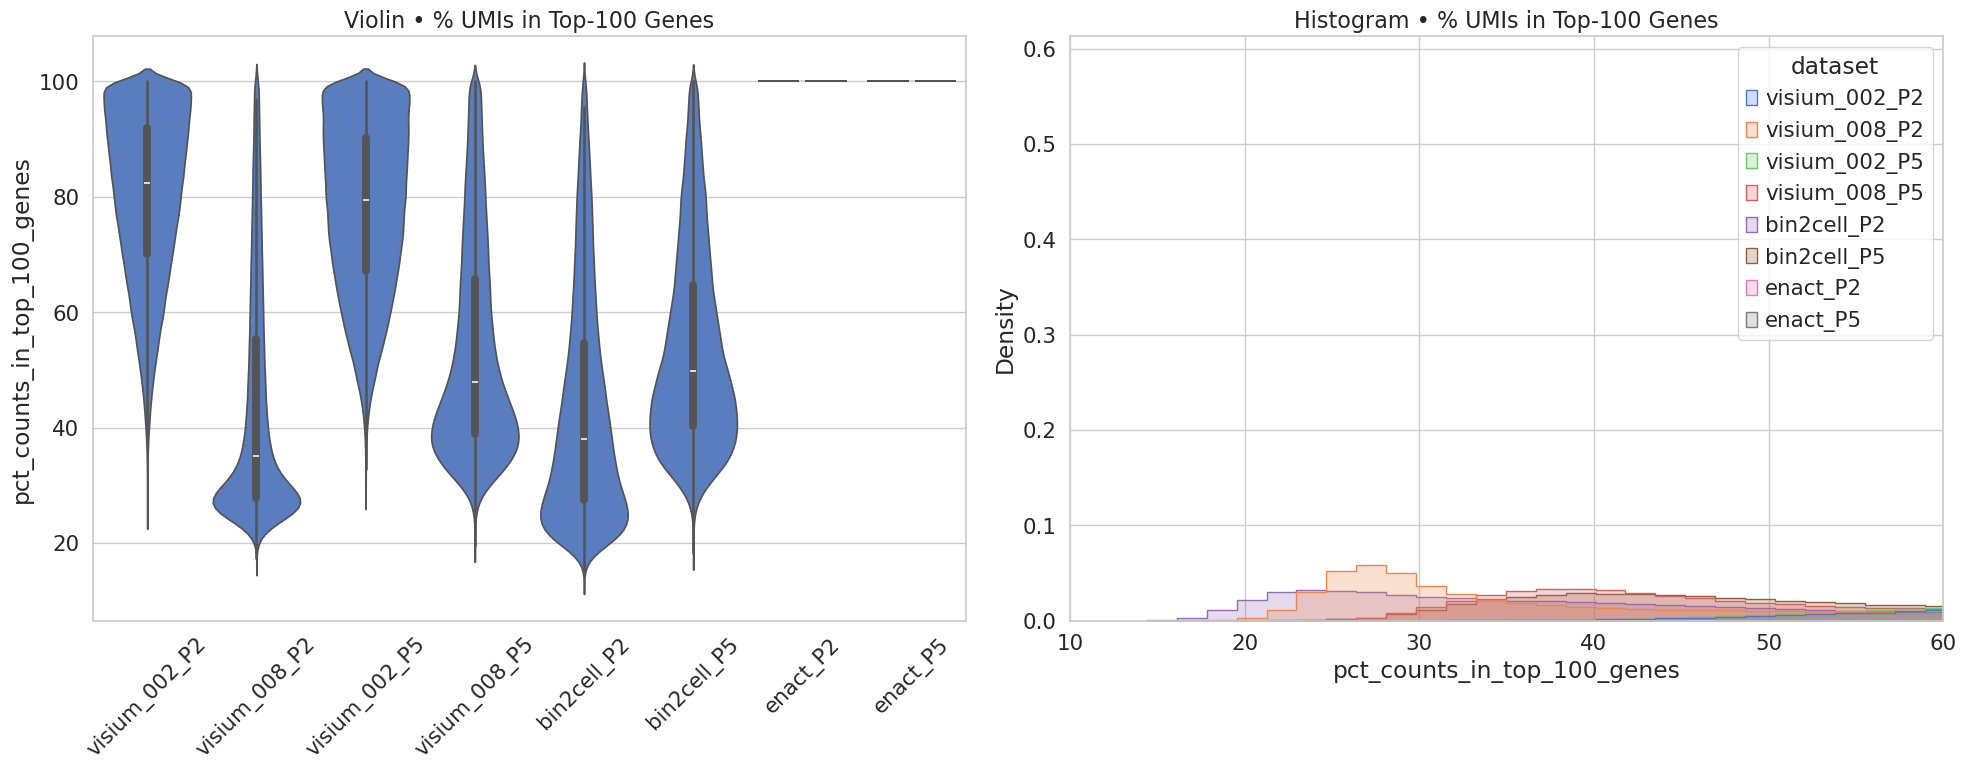

In [23]:

sns.set(style="whitegrid", palette="muted", font_scale=1.4)  # <- font a bit larger

titles = [
    ('n_genes_by_counts',           'Genes per Cell'),
    ('log1p_n_genes_by_counts',     'logₑ(Genes + 1)'),
    ('total_counts',                'UMIs per Cell'),
    ('log1p_total_counts',          'logₑ(UMIs + 1)'),
    ('pct_counts_in_top_50_genes',  '% UMIs in Top-50 Genes'),
    ('pct_counts_in_top_100_genes', '% UMIs in Top-100 Genes'),
]

for feat, ttl in titles:
    fig = plt.figure(figsize=(20, 8))          

    ax_v = fig.add_subplot(1, 2, 1)
    sns.violinplot(data=qc_all_df, x="dataset", y=feat,
                   scale='width', inner='box', ax=ax_v)
    ax_v.set_title(f'Violin • {ttl}', fontsize=16)
    ax_v.set_xlabel('')
    ax_v.tick_params(axis='x', rotation=45)

    ax_h = fig.add_subplot(1, 2, 2)
    sns.histplot(data=qc_all_df, x=feat, hue="dataset",
                 element="step", bins=50, stat="density",
                 common_norm=False, ax=ax_h)
    ax_h.set_title(f'Histogram • {ttl}', fontsize=16)
    ax_h.set_ylabel('Density')

    if feat == 'n_genes_by_counts':
        ax_v.set_ylim(0, 1500)
        ax_h.set_xlim(0, 1500)
    elif feat == 'total_counts':
        ax_v.set_ylim(0, 6000)
        ax_h.set_xlim(0, 6000)
    elif feat in ('pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes'):
        ax_h.set_xlim(10, 60)

    plt.tight_layout()
    plt.show()


In [2]:
paths = {
    "visium_002_P2": "/gpfs/commons/groups/innovation/jjoseph/data/P2_CRC/binned_outputs/square_002um/",
    "visium_008_P2": "/gpfs/commons/groups/innovation/jjoseph/data/P2_CRC/binned_outputs/square_008um/",

    "bin2cell_P2":   "/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P2CRC/P2CRC_b2c_cells.h5ad",

    "enact_P2":      "/gpfs/commons/groups/innovation/jjoseph/enact_results/P2_CRC/Cache/colon_P2/tmap/weighted_by_area|celltypist_cells_adata.h5",
    "smurf_P2":      "smurf_results/smurf_p2_interactive_07_20/adata_sc_final.h5ad",
}

FEATURES = [
    'n_genes_by_counts', 'log1p_n_genes_by_counts',
    'total_counts', 'log1p_total_counts',
    'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes'
]

dfs = []
for label, path in paths.items():
    if os.path.isdir(path):                              
        adata = b2c.read_visium(path)
        adata.var_names_make_unique()
        sc.pp.filter_genes(adata, min_cells=3)
        sc.pp.filter_cells(adata, min_genes=100)
    else:                                                
        adata = sc.read_h5ad(path)
        if "enact" not in label:                      
            sc.pp.filter_cells(adata, min_genes=100)

    sc.pp.calculate_qc_metrics(adata, inplace=True)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    dfs.append(adata.obs[FEATURES].assign(dataset=label))

qc_all_df = pd.concat(dfs, ignore_index=True)


In [3]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

titles = [
    ('n_genes_by_counts',            'Genes per Cell'),
    ('log1p_n_genes_by_counts',      'logₑ(genes + 1)'),
    ('total_counts',                 'UMIs per Cell'),
    ('log1p_total_counts',           'logₑ(UMIs + 1)'),
    ('pct_counts_in_top_50_genes',   '% UMIs in Top 50 Genes'),
    ('pct_counts_in_top_100_genes',  '% UMIs in Top 100 Genes')
]

for feat, ttl in titles:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    sns.violinplot(data=qc_all_df, x="dataset", y=feat,
                   scale='width', inner='box')
    plt.xticks(rotation=45); plt.title(f'Violin • {ttl}')

    plt.subplot(1,2,2)
    sns.histplot(data=qc_all_df, x=feat, hue="dataset",
                 element="step", bins=50,
                 stat="density", common_norm=False)
    plt.title(f'Histogram • {ttl}')

    plt.tight_layout(); plt.show()




# n genes by counts:  number of genes >1 umi in a cell 
# log: natural log 

#total counts: total umi detected in cell 

#percent counts in top 50& 100 : of  each cells umi coming from 50 expressed genes 


In [4]:
%matplotlib inline
print(qc_all_df.dataset.value_counts())


dataset
visium_008_P2    419309
visium_002_P2    387731
enact_P2         319662
bin2cell_P2      231841
smurf_P2          90903
Name: count, dtype: int64


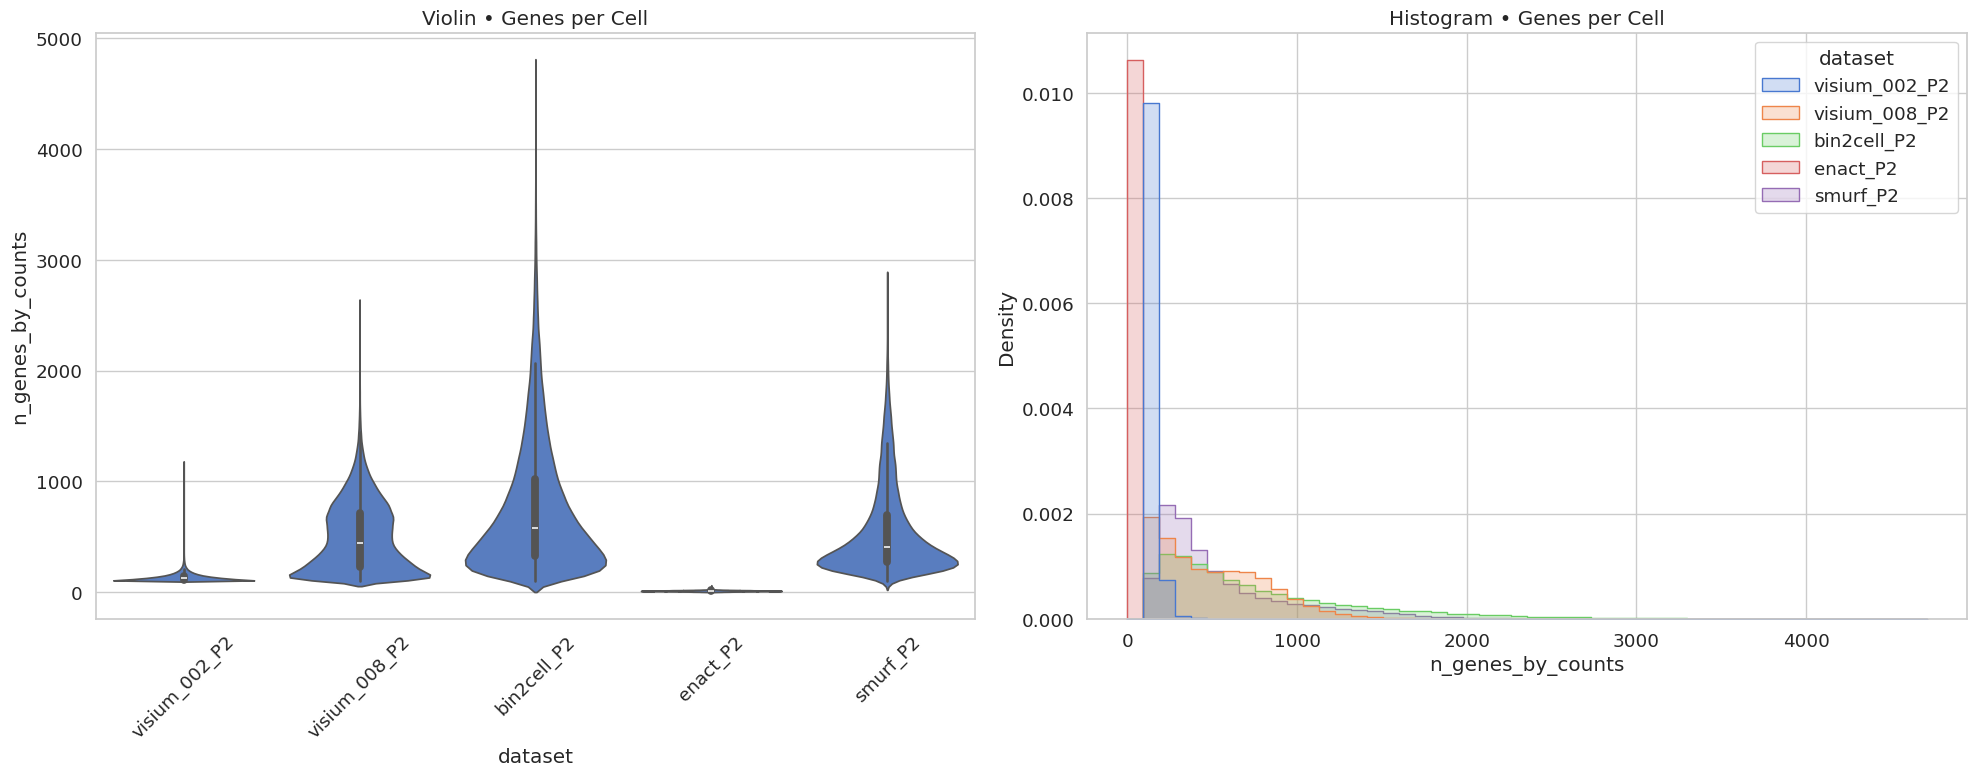

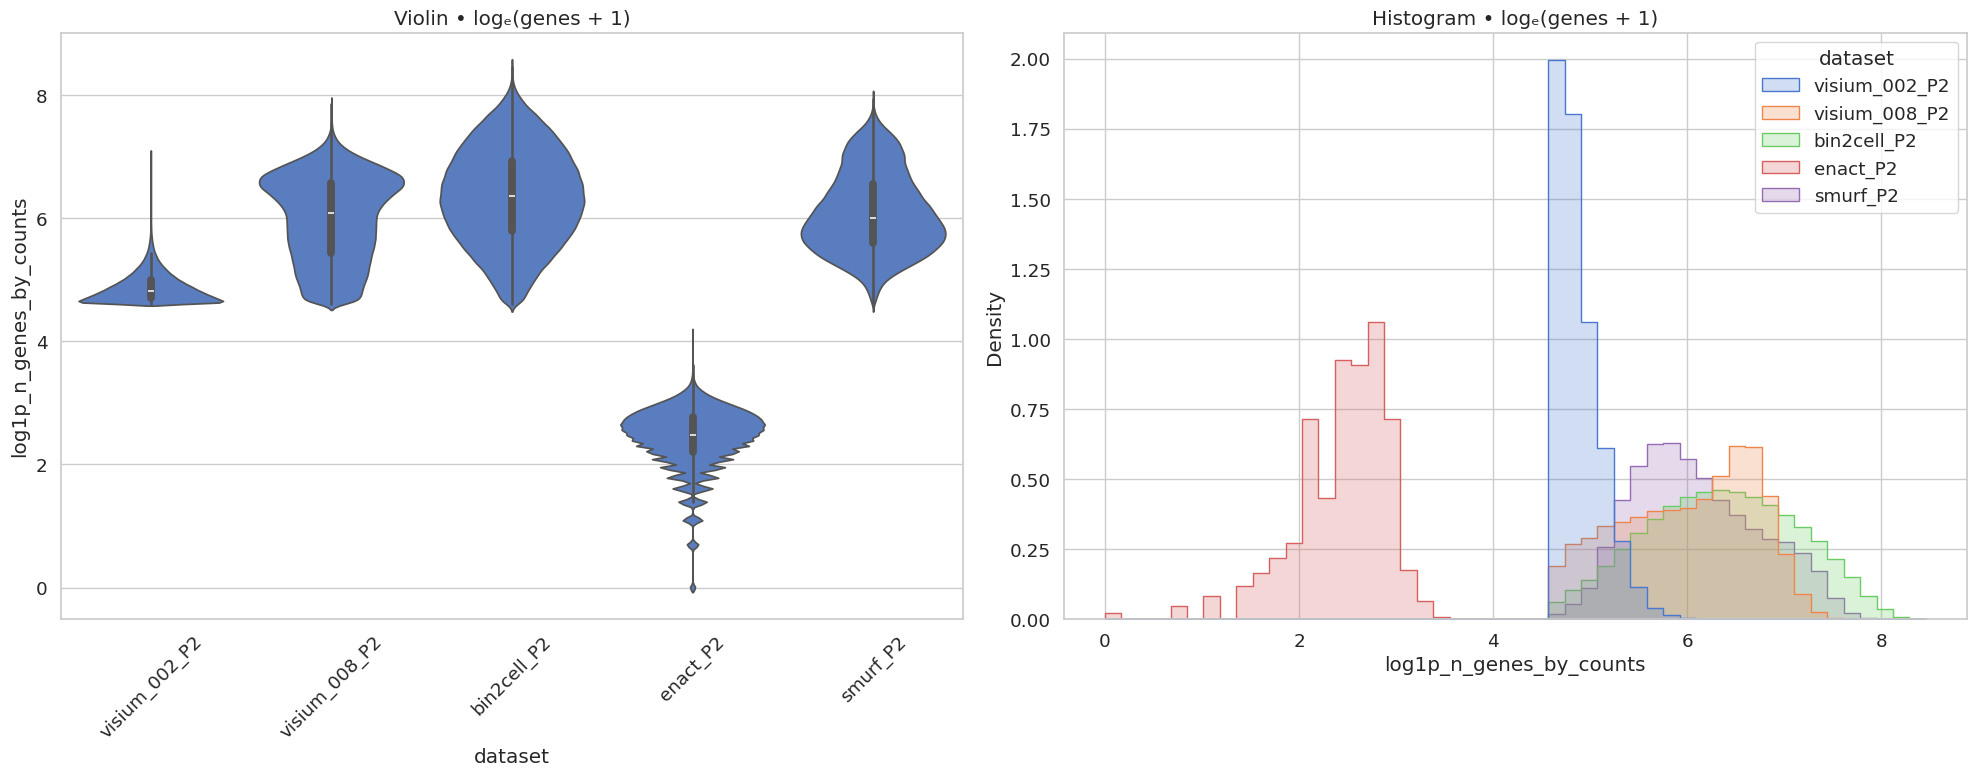

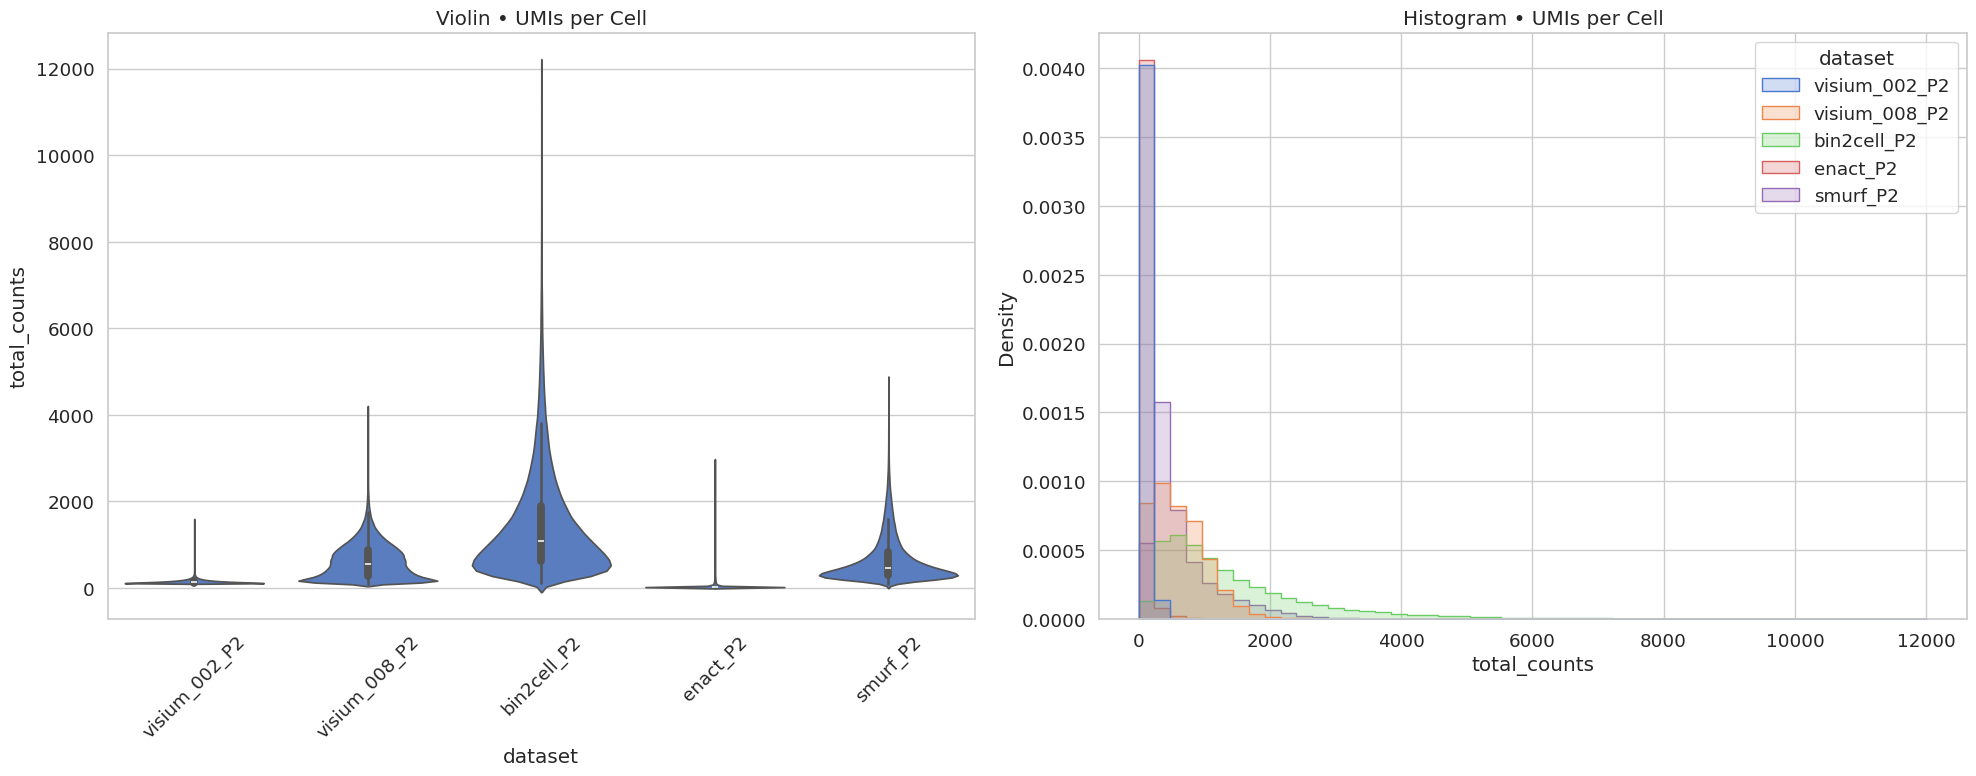

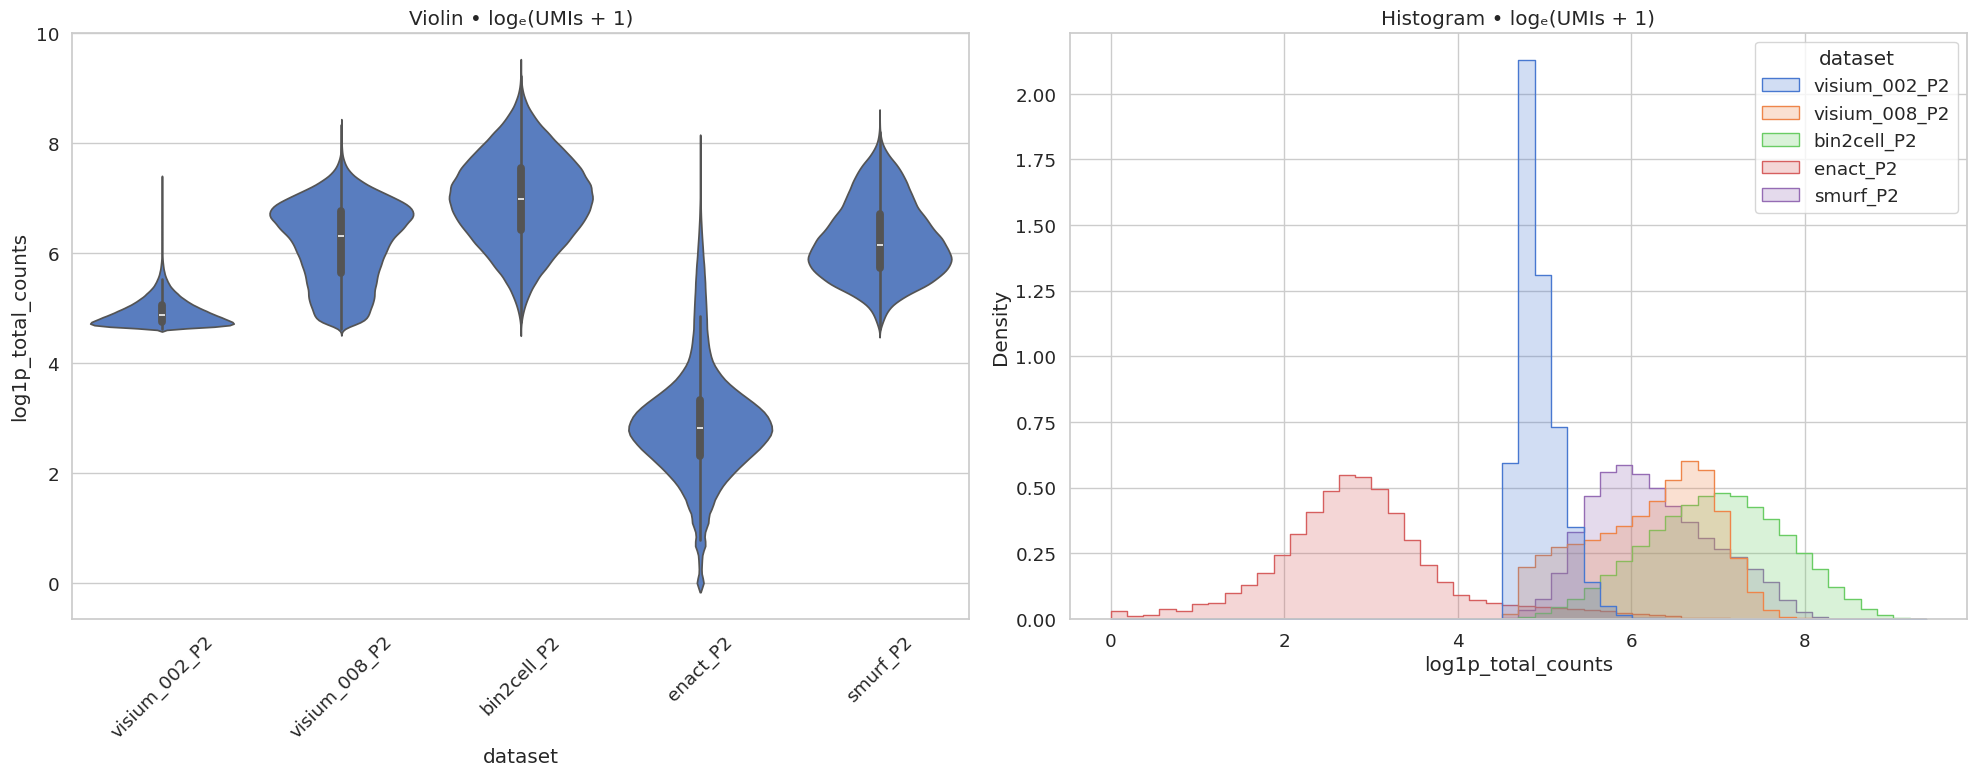

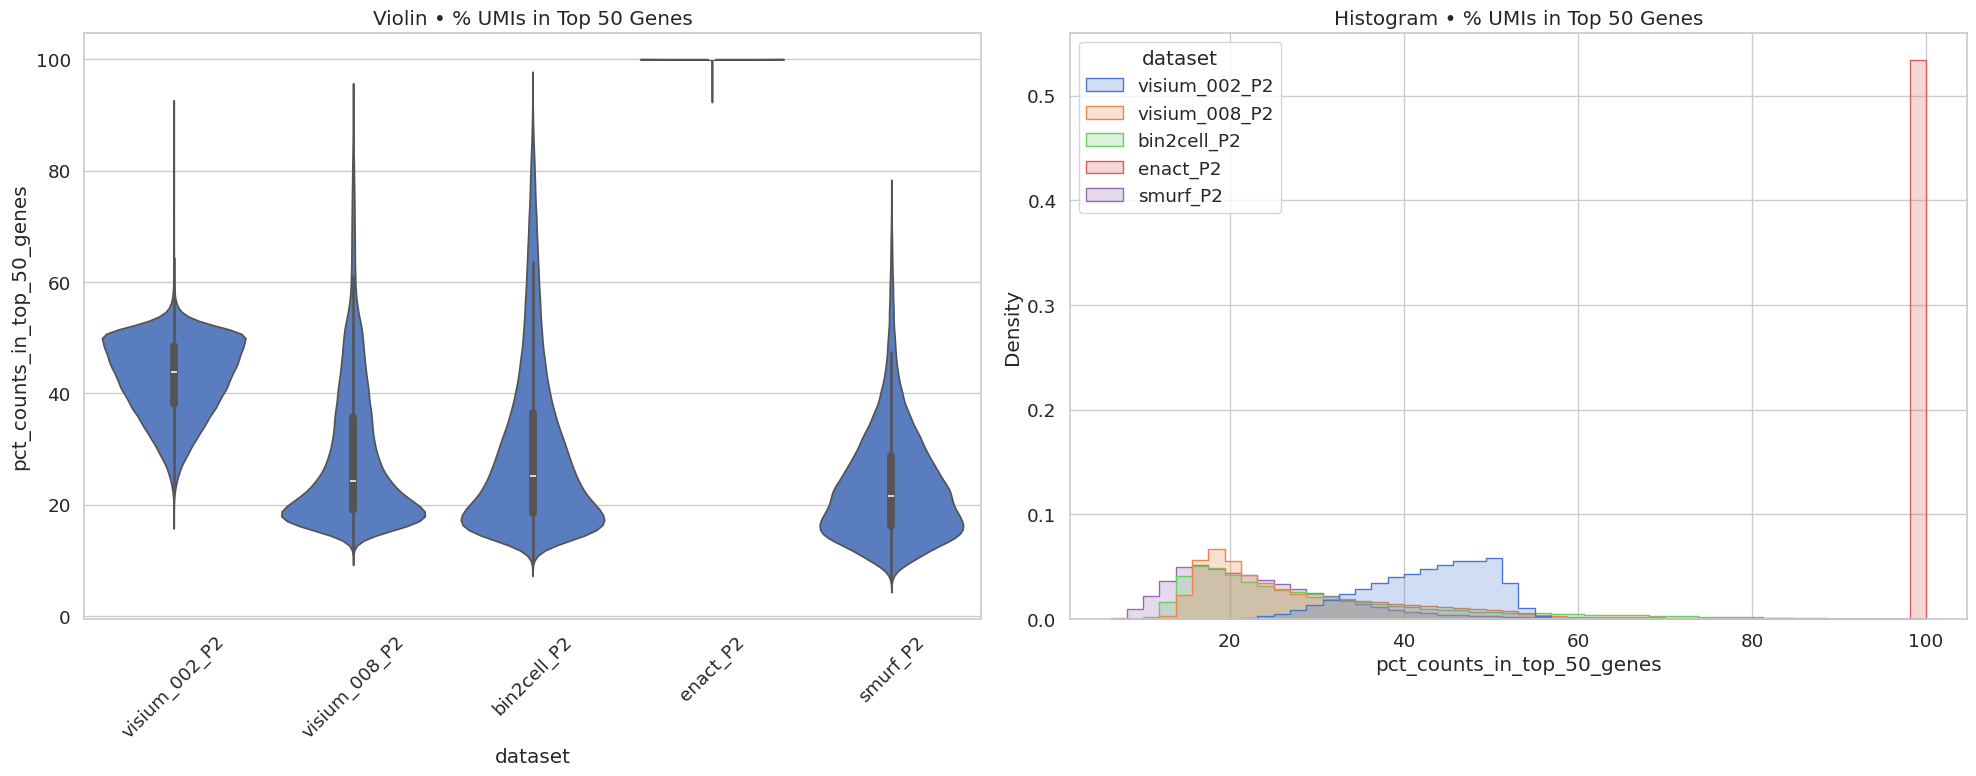

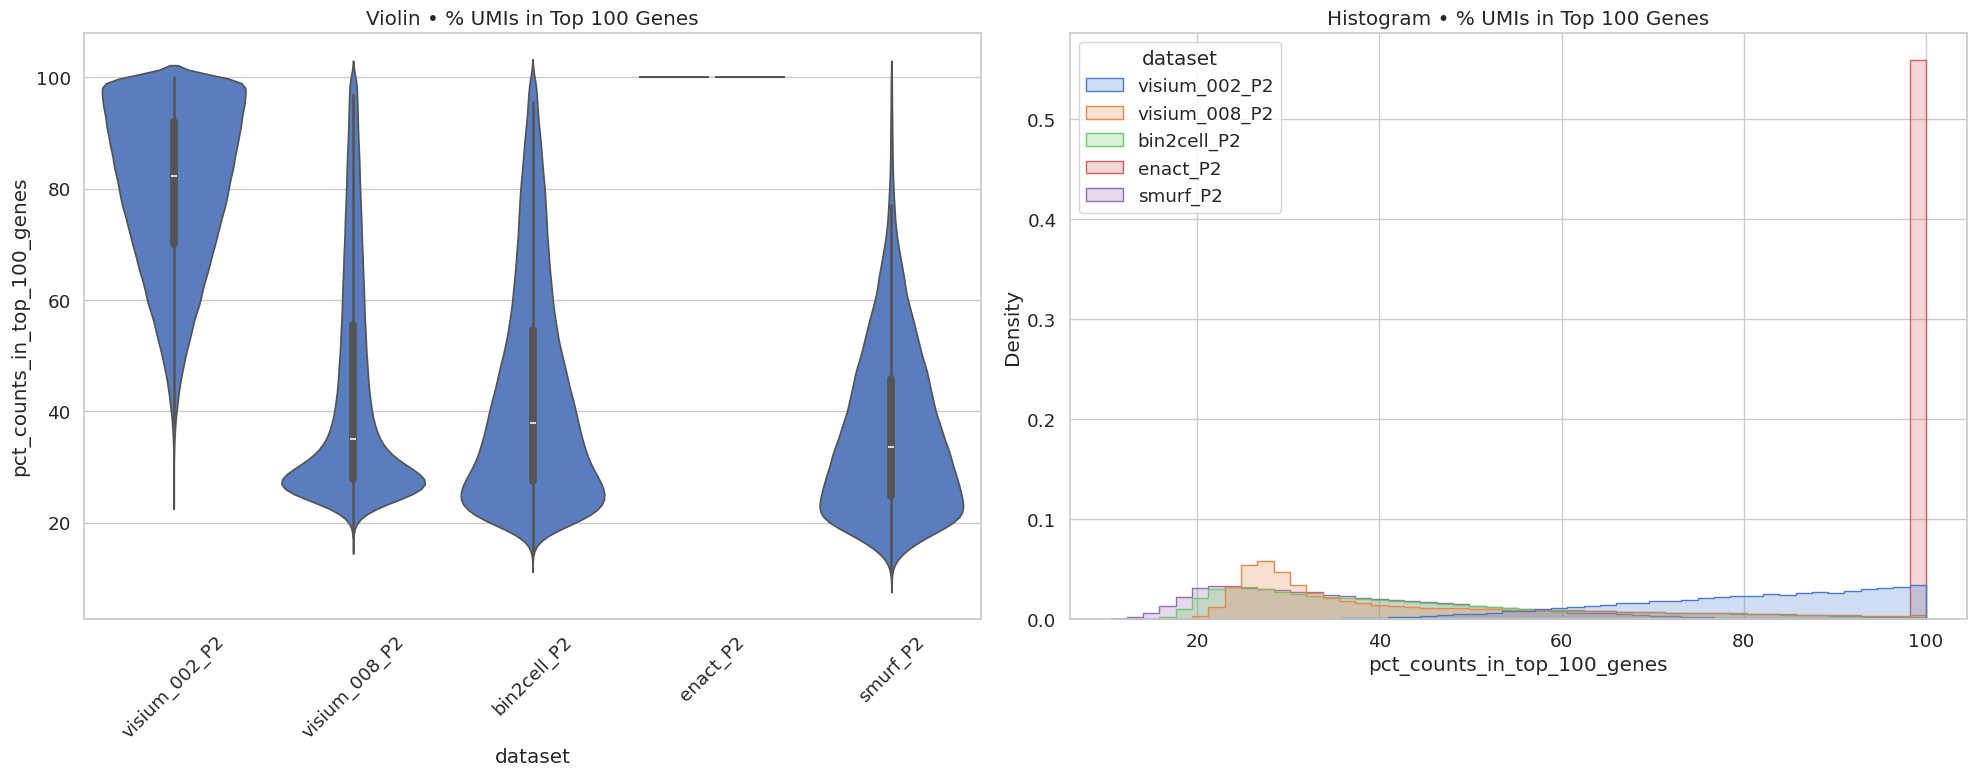

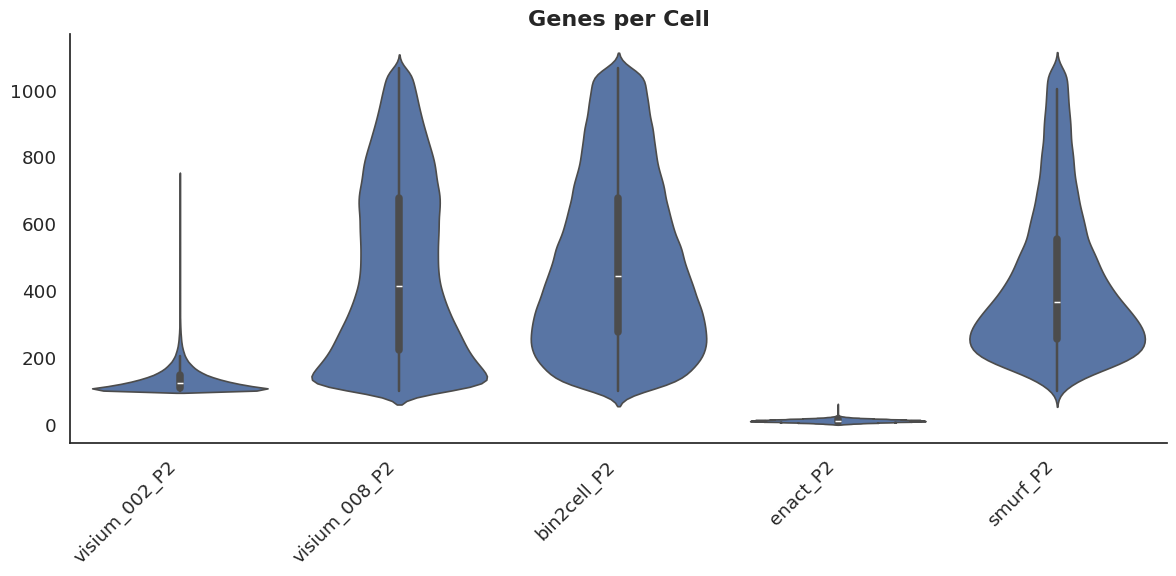

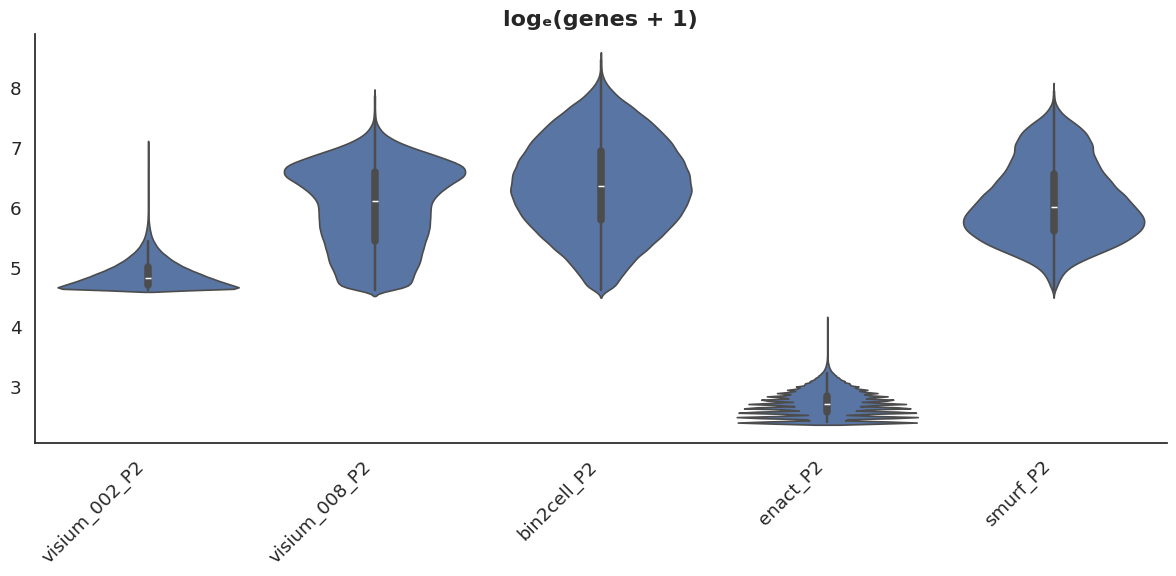

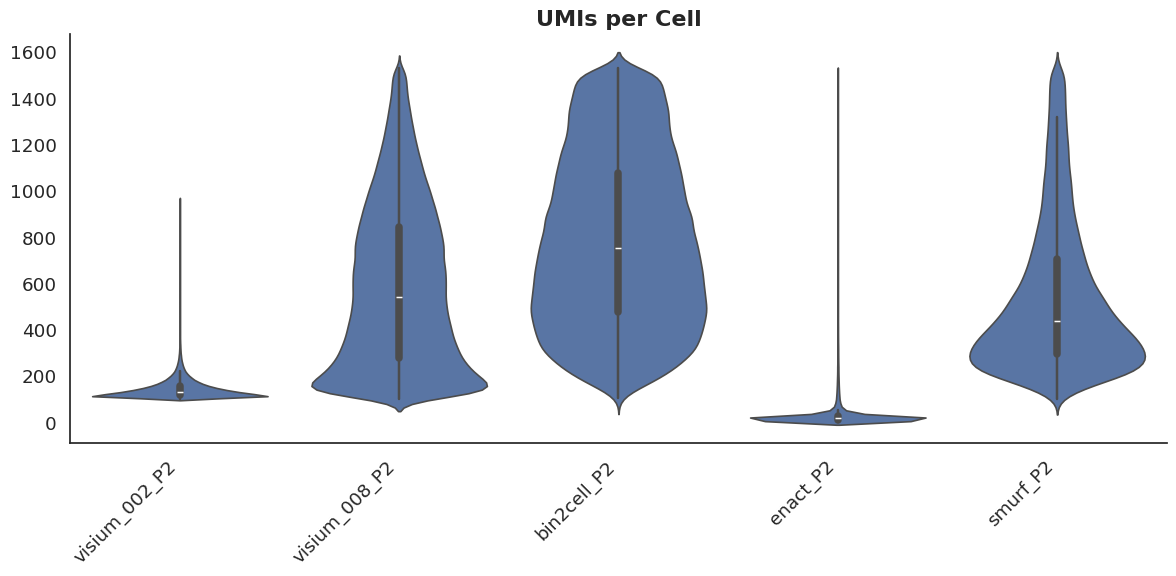

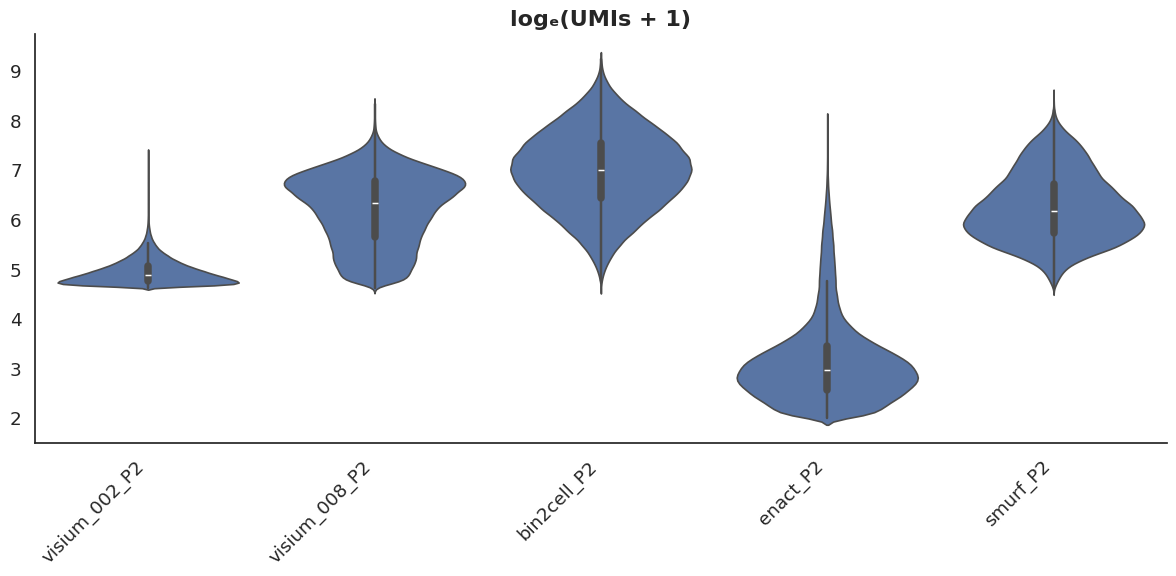

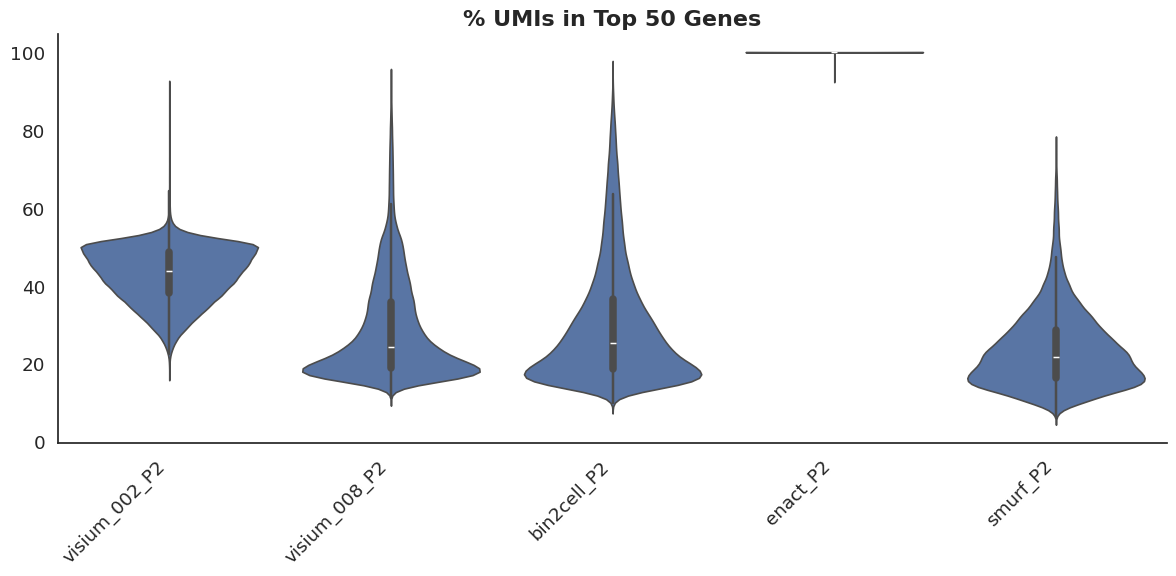

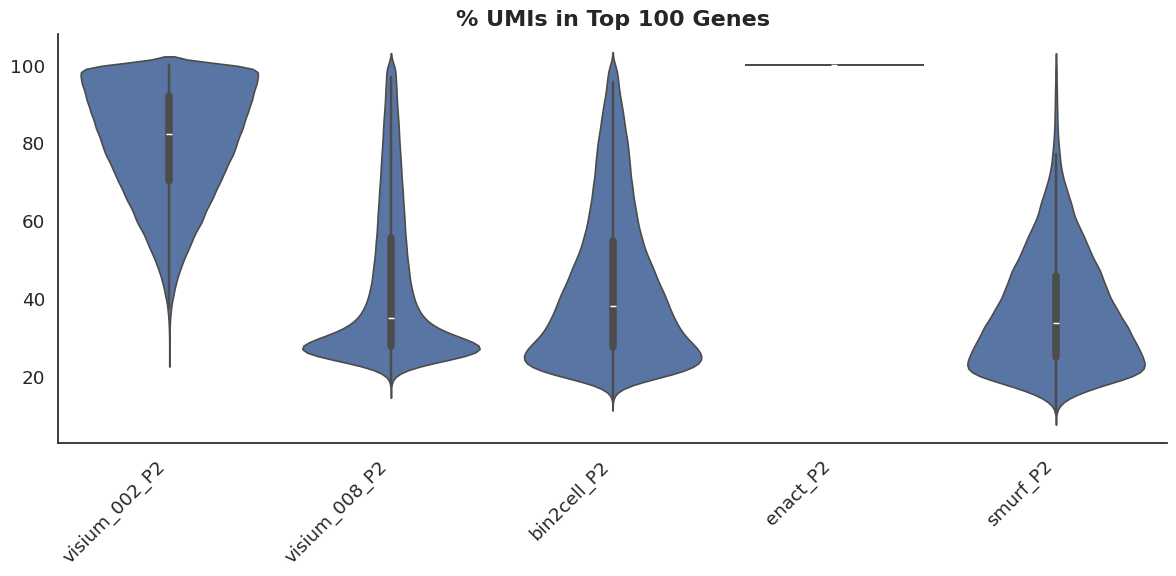

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.2)
sns.set_style("white")  
titles = [
    ('n_genes_by_counts',            'Genes per Cell'),
    ('log1p_n_genes_by_counts',      'logₑ(genes + 1)'),
    ('total_counts',                 'UMIs per Cell'),
    ('log1p_total_counts',           'logₑ(UMIs + 1)'),
    ('pct_counts_in_top_50_genes',   '% UMIs in Top 50 Genes'),
    ('pct_counts_in_top_100_genes',  '% UMIs in Top 100 Genes')
]

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for feat, ttl in titles:
    df_filtered = remove_outliers(qc_all_df, feat)

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(data=df_filtered, x="dataset", y=feat,
                        scale='width', inner='box', linewidth=1.2)
    
    plt.xticks(rotation=45, ha='right')
    plt.title(ttl, fontsize=16, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
    sns.despine()  # Removes top and right spines
    plt.tight_layout()
    plt.show()


In [44]:
enact_adata.obsm["stats"]

num_shared_bins  num_unique_bins  num_transcripts
id                                                         
ID_18217               15               22               28
ID_18265               14               29               10
ID_18449                8                8               17
ID_18472               24               16               17
ID_18615               21                9               12
...                   ...              ...              ...
ID_99994               26               28               21
ID_99995               23               11               13
ID_99996               20                9                4
ID_99997                9               35               28
ID_99999               19               24               17

[319662 rows x 3 columns]

In [45]:
# How many cells in total?
print("N cells in ENACT:", enact_adata.n_obs)

# Summary of num_transcripts
stats = enact_adata.obsm["stats"]
print(stats["num_transcripts"].describe())
print(stats["num_transcripts"].quantile([0.95, 0.99, 0.999]))


N cells in ENACT: 319662
count    319662.000000
mean         33.982991
std          76.931061
min           0.000000
25%           9.000000
50%          15.000000
75%          27.000000
max        2965.000000
Name: num_transcripts, dtype: float64
0.950    131.0
0.990    402.0
0.999    862.0
Name: num_transcripts, dtype: float64
